In [1]:
%run EDA.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3114 non-null   object 
 1   county                  3114 non-null   object 
 2   fips                    3114 non-null   int64  
 3   trump16                 3114 non-null   int64  
 4   clinton16               3114 non-null   int64  
 5   otherpres16             3114 non-null   int64  
 6   romney12                3114 non-null   int64  
 7   obama12                 3114 non-null   int64  
 8   otherpres12             3114 non-null   int64  
 9   demsen16                1942 non-null   float64
 10  repsen16                1942 non-null   float64
 11  othersen16              1942 non-null   float64
 12  demhouse16              2862 non-null   float64
 13  rephouse16              2862 non-null   float64
 14  otherhouse16            2862 non-null   

In [2]:
#checking data to make sure it's okay
pd.set_option('display.max_columns', None)
merged_df_no_sen

,state,fips,total_population,black_pct,hispanic_pct,nonwhite_pct,foreignborn_pct,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,pres_16_mov,pres_12_mov,house_16_mov,dem_win,cvap_pct
0,Alabama,1001,55049.0,18.370906,2.572254,24.316518,1.838362,51.176225,40.037058,13.978456,53099.0,5.591657,12.417046,75.407229,10.002112,74.065601,42.002162,-0.489969,-0.460304,-0.280756,0,0.739160
1,Alabama,1003,199510.0,9.225603,4.366698,16.821212,3.269510,51.194928,35.474412,18.714851,51365.0,6.286843,9.972418,70.452889,7.842227,68.405607,42.279099,-0.571601,-0.557688,-0.571601,0,0.760714
2,Alabama,1005,26614.0,47.888329,4.309762,54.114376,2.859397,46.498084,37.664387,16.528895,33956.0,12.824738,26.235928,87.132213,19.579752,81.364746,67.789635,-0.055688,0.031454,0.100637,0,0.765575
3,Alabama,1007,22572.0,21.212121,2.223994,25.234804,1.351232,46.464646,37.329435,14.885699,39776.0,7.146827,19.301587,88.000000,15.020490,87.471774,68.352607,-0.551536,-0.466746,-0.542860,0,0.779284
4,Alabama,1009,57704.0,1.557951,8.727298,12.342299,4.271801,50.485235,37.240053,17.192916,46212.0,5.953833,19.968585,86.950243,16.643368,86.163610,89.951502,-0.809090,-0.740940,-0.805394,0,0.735304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,Wyoming,56037,44812.0,0.865840,15.859591,20.184326,5.509685,47.824244,44.153352,9.417120,68233.0,5.072255,9.314606,78.628507,6.238463,76.606813,10.916313,-0.520899,-0.393844,-0.155873,0,0.682072
3107,Wyoming,56039,22623.0,0.614419,15.174822,18.799452,11.475048,48.097069,35.569995,11.837510,75594.0,2.123447,4.633570,46.211584,1.526877,41.769504,46.430920,0.268710,0.118196,0.236655,1,0.722053
3108,Wyoming,56041,20893.0,0.186665,8.959939,12.281625,3.986981,49.327526,43.205858,10.678218,53323.0,6.390755,10.361224,81.793082,8.806312,81.080852,43.095937,-0.584652,-0.584026,-0.450408,0,0.687072
3109,Wyoming,56043,8351.0,0.790325,13.962400,17.602682,3.783978,51.359119,34.774279,19.650341,46212.0,7.441860,12.577108,78.923920,10.299738,75.980688,35.954529,-0.623755,-0.562880,-0.500388,0,0.734643


In [3]:
#importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, RocCurveDisplay, ConfusionMatrixDisplay, classification_report, precision_recall_curve
from sklearn.metrics import roc_curve, auc

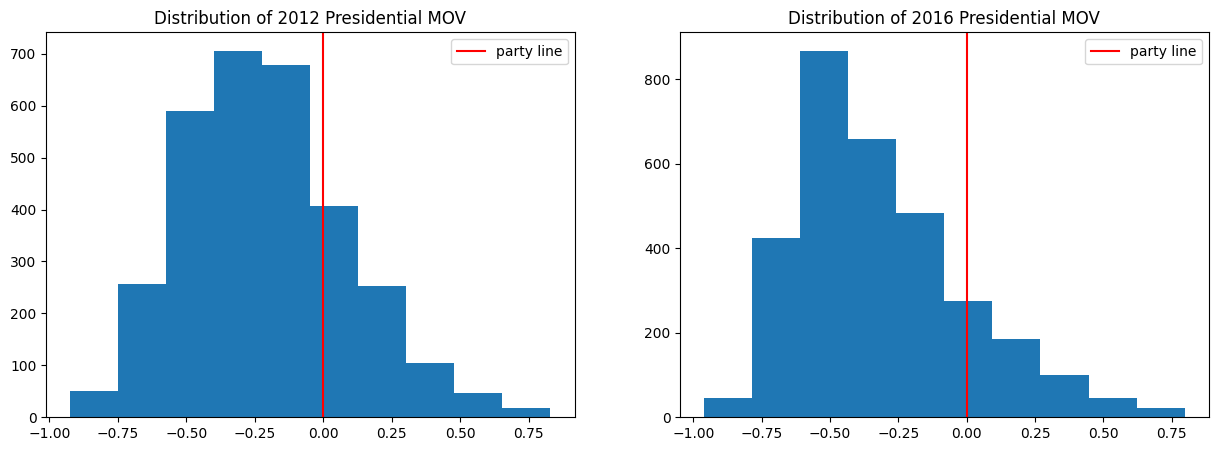

In [4]:
#checking the distribution of margins of victory for past elections
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
x = merged_df_no_sen["pres_12_mov"]
y = merged_df_no_sen["pres_16_mov"]
ax1.hist(x)
ax2.hist(y)
ax1.set_title("Distribution of 2012 Presidential MOV")
ax2.set_title("Distribution of 2016 Presidential MOV")
ax1.axvline(x = 0, color = 'r', label = 'party line')
ax2.axvline(x = 0, color = 'r', label = 'party line')
ax1.legend()
ax2.legend();

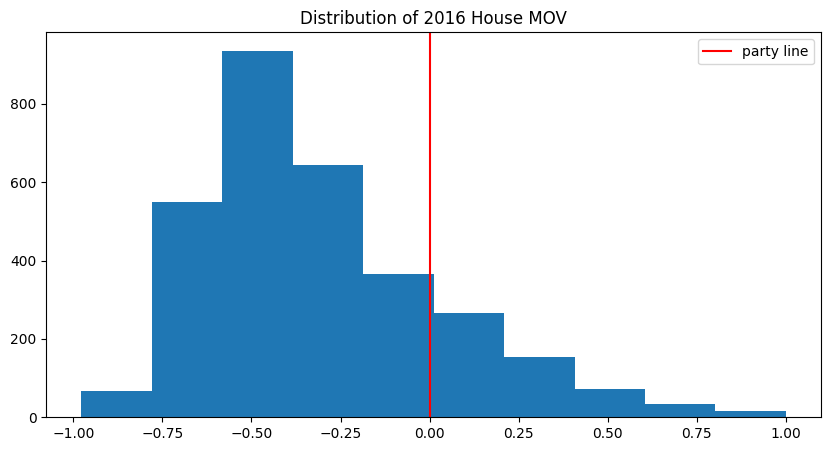

In [5]:
#same as last cell, checking distribution of counties mov for previous elections
fig, ax = plt.subplots(1, figsize=(10,5))
z = merged_df_no_sen["house_16_mov"]
ax.hist(z)
ax.set_title("Distribution of 2016 House MOV")
ax.axvline(x = 0, color = 'r', label = 'party line')
ax.legend();

In [6]:
#a statistics summary of the distributions
merged_df_no_sen[["pres_12_mov", "pres_16_mov", "house_16_mov"]].describe()

,pres_12_mov,pres_16_mov,house_16_mov
count,3107.000000,3107.000000,3107.000000
mean,-0.211980,-0.317879,-0.305114
std,0.294822,0.306974,0.337164
min,-0.924138,-0.960334,-0.977615
25%,-0.424361,-0.546574,-0.549082
50%,-0.236954,-0.379721,-0.384167
75%,-0.029993,-0.146918,-0.121183
max,0.830210,0.797259,0.999774


In [7]:
# merged_df_no_sen[merged_df_no_sen["state"] == 'Florida'].sort_values(by="fips", ascending=False)

In [8]:
#setting my feature and target variables
X = merged_df_no_sen.drop(columns=['dem_win', 'state', 'fips'], axis=1)
y = merged_df_no_sen['dem_win']

In [9]:
#splitting my data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=34567)

In [10]:
#conducting a decision tree model 
tree_clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=1234)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1234)

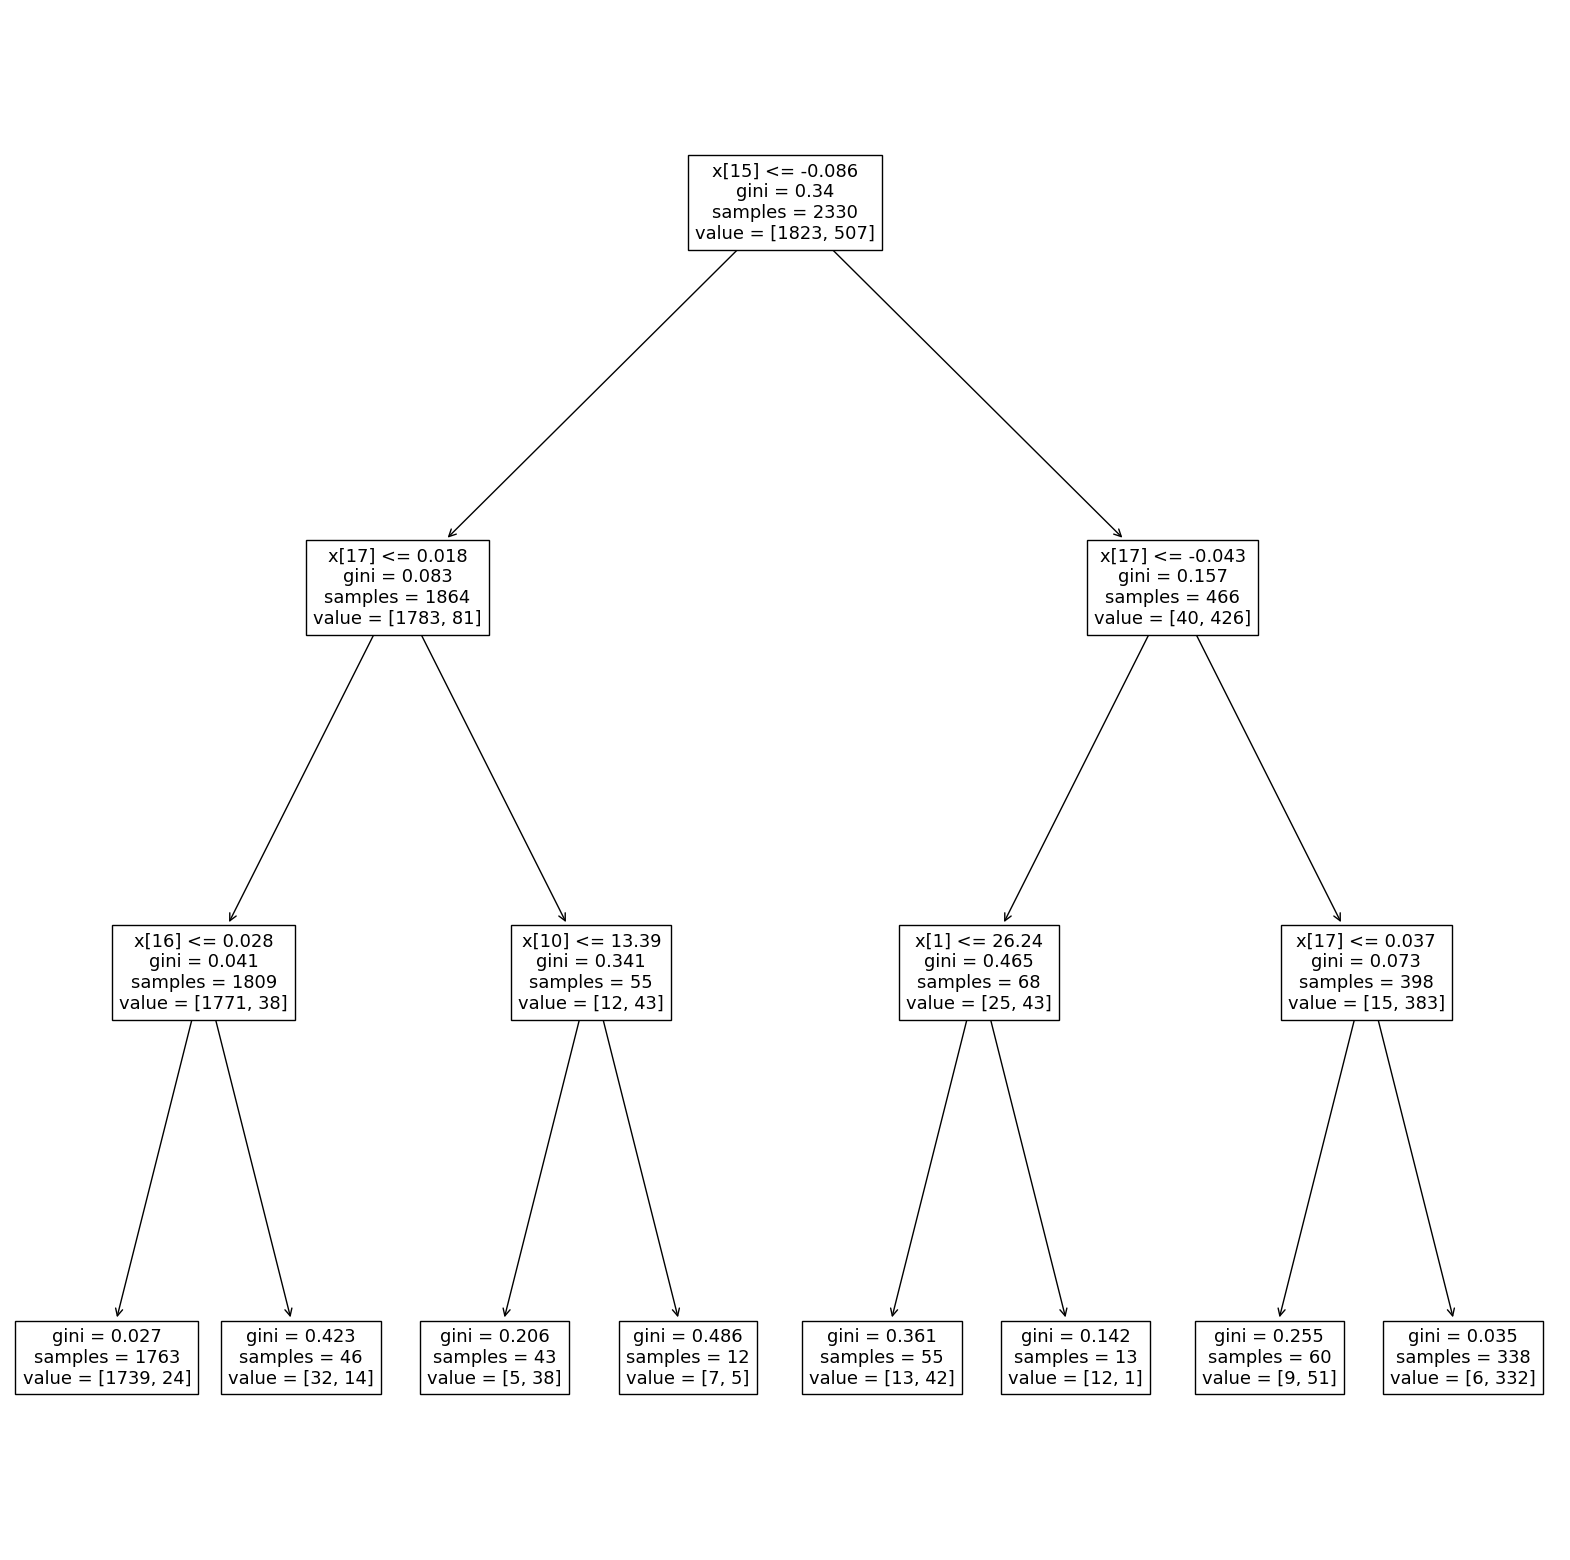

In [11]:
#plotting the decision tree
f, ax =  plt.subplots(figsize=(20,20))
plot_tree(tree_clf, ax=ax);

In [12]:
#getting the accuracy score on the train data
tree_clf.score(X_train, y_train)

0.9669527896995708

In [13]:
#accuracy score of the test data
y_pred = tree_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.9601029601029601

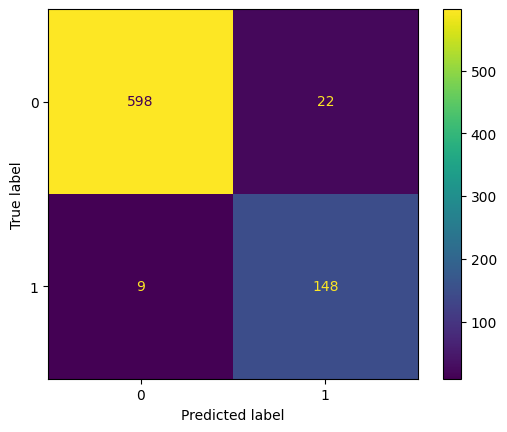

In [14]:
#a confusion matrix for the decision tree with all features
ConfusionMatrixDisplay.from_estimator(tree_clf, X_test, y_test);

In [15]:
#calcuating the accuracy score of the confusion matrix
accuracy = (147+593)/(147+593+13+22)
accuracy

0.9548387096774194

In [16]:
#calcuating the recall score of the confusion matrix
recall = 147/(147+22)
recall

0.8698224852071006

In [17]:
##calcuating the precision score of the confusion matrix
precision =  147/(147+13)
precision

0.91875

In [18]:
#calcuating the f1 score of the confusion matrix
f1_score = (2*147)/(2*147+13+22)
f1_score

0.8936170212765957

In [19]:
#a summarized classification report 
print(classification_report(y_test, y_pred, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       620
           1       0.87      0.94      0.91       157

    accuracy                           0.96       777
   macro avg       0.93      0.95      0.94       777
weighted avg       0.96      0.96      0.96       777



In [20]:
#breaking the features down into categories 
education = ['lesshs_pct', 'lesscollege_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct']
race = ['black_pct', 'hispanic_pct', 'nonwhite_pct', 'foreignborn_pct']
demographic = ['black_pct', 'hispanic_pct', 'nonwhite_pct', 'foreignborn_pct', 'rural_pct', 'female_pct']
age = ['age29andunder_pct', 'age65andolder_pct', 'cvap_pct', 'total_population']
income = ['median_hh_inc', 'clf_unemploy_pct']

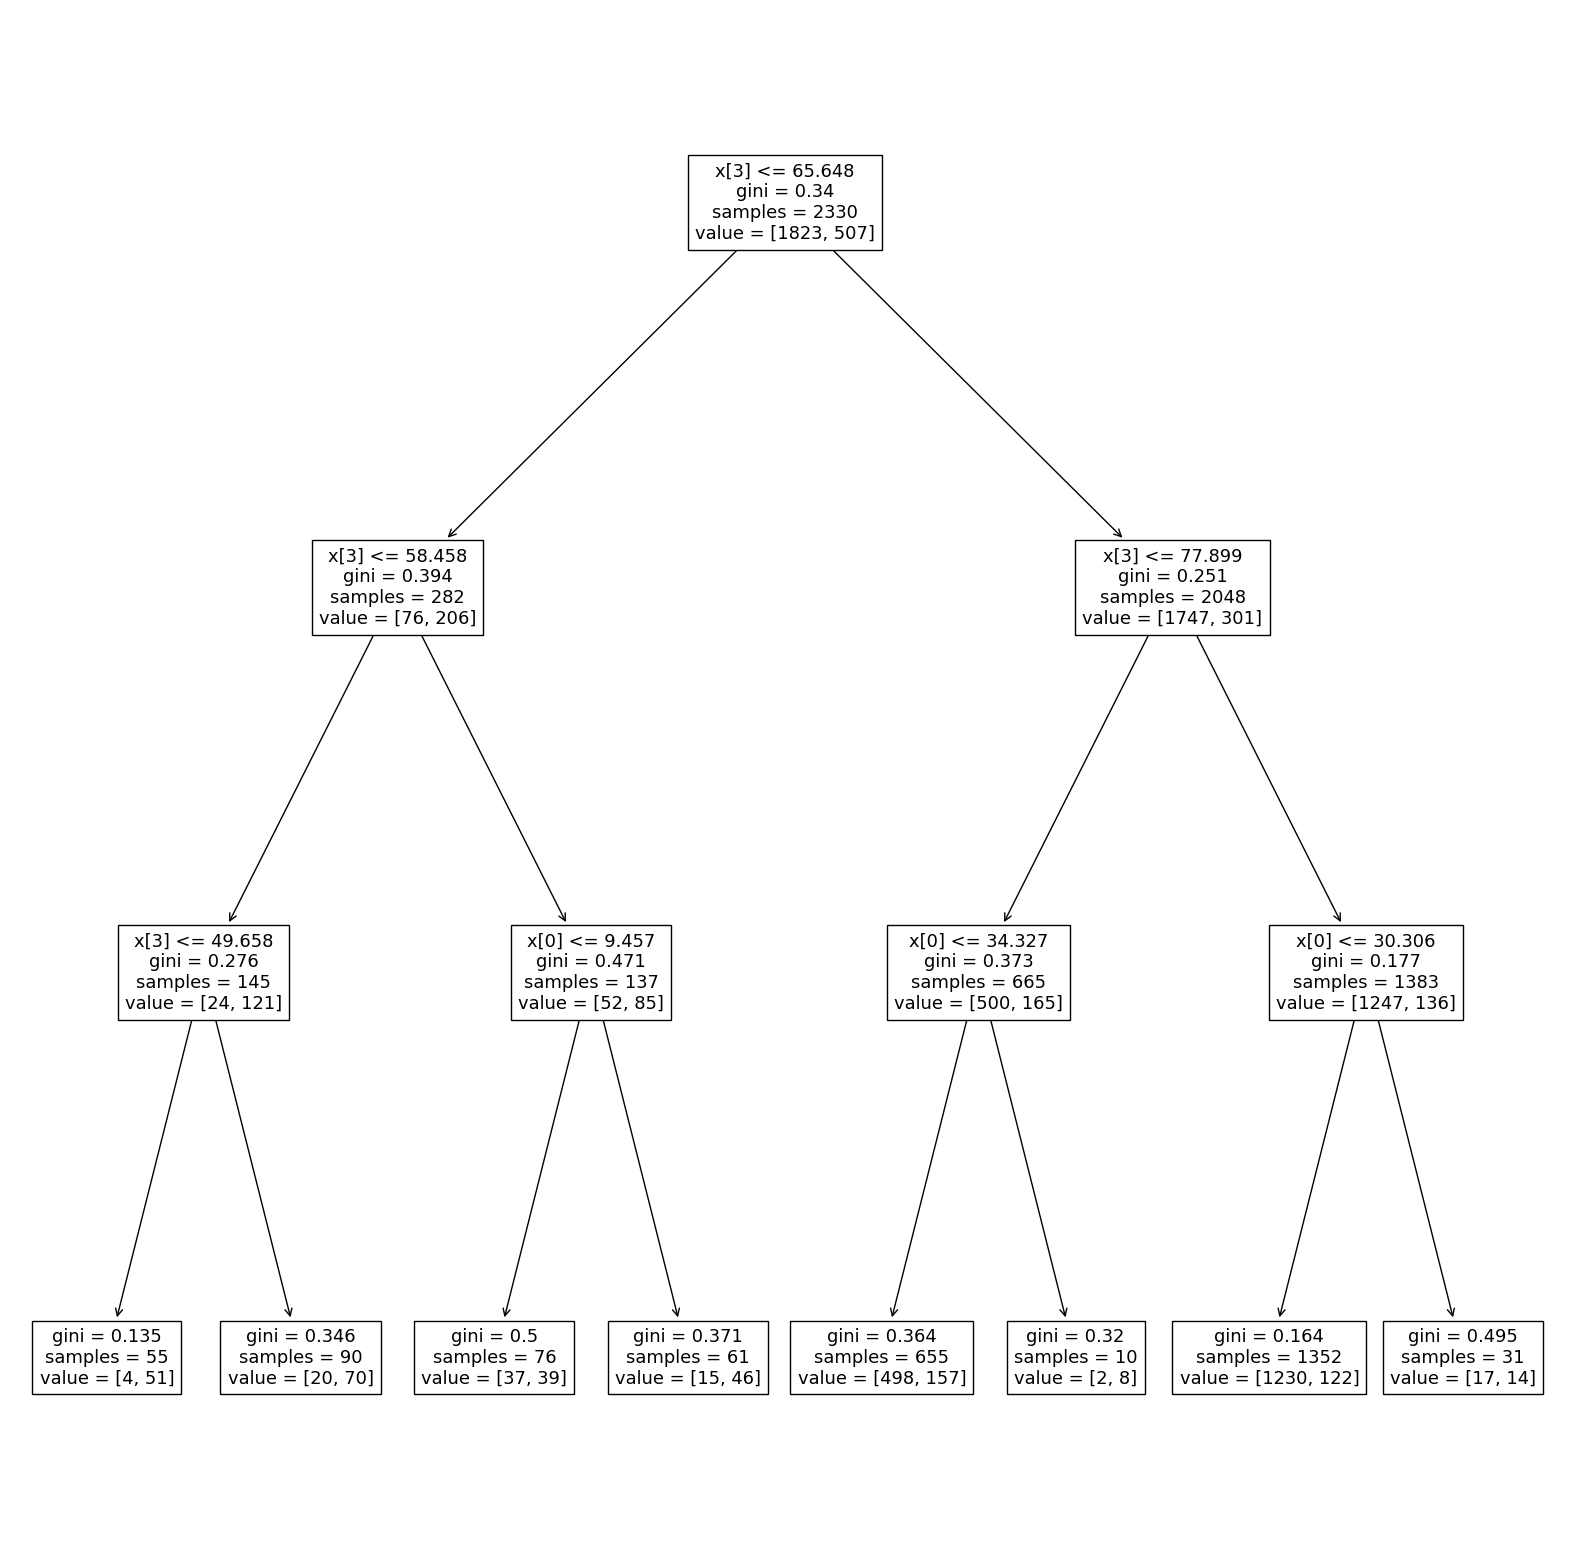

In [21]:
#conducting a decision tree with the features in education list
X_edu = merged_df_no_sen[education]
y_edu = merged_df_no_sen['dem_win']

X_train_edu, X_test_edu, y_train_edu, y_test_edu = train_test_split(X_edu, y_edu, test_size=0.25, random_state=34567)

tree_clf_edu = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=1234)
tree_clf_edu.fit(X_train_edu, y_train_edu)

f, ax =  plt.subplots(figsize=(20,20))
plot_tree(tree_clf_edu, ax=ax);

In [22]:
#accuracy score on train data from education features
tree_clf_edu.score(X_train_edu, y_train_edu)

0.8407725321888412

In [23]:
#accuracy score on the test data from education features
y_pred_edu = tree_clf_edu.predict(X_test_edu)
acc_edu = accuracy_score(y_test_edu, y_pred_edu)
acc_edu

0.8378378378378378

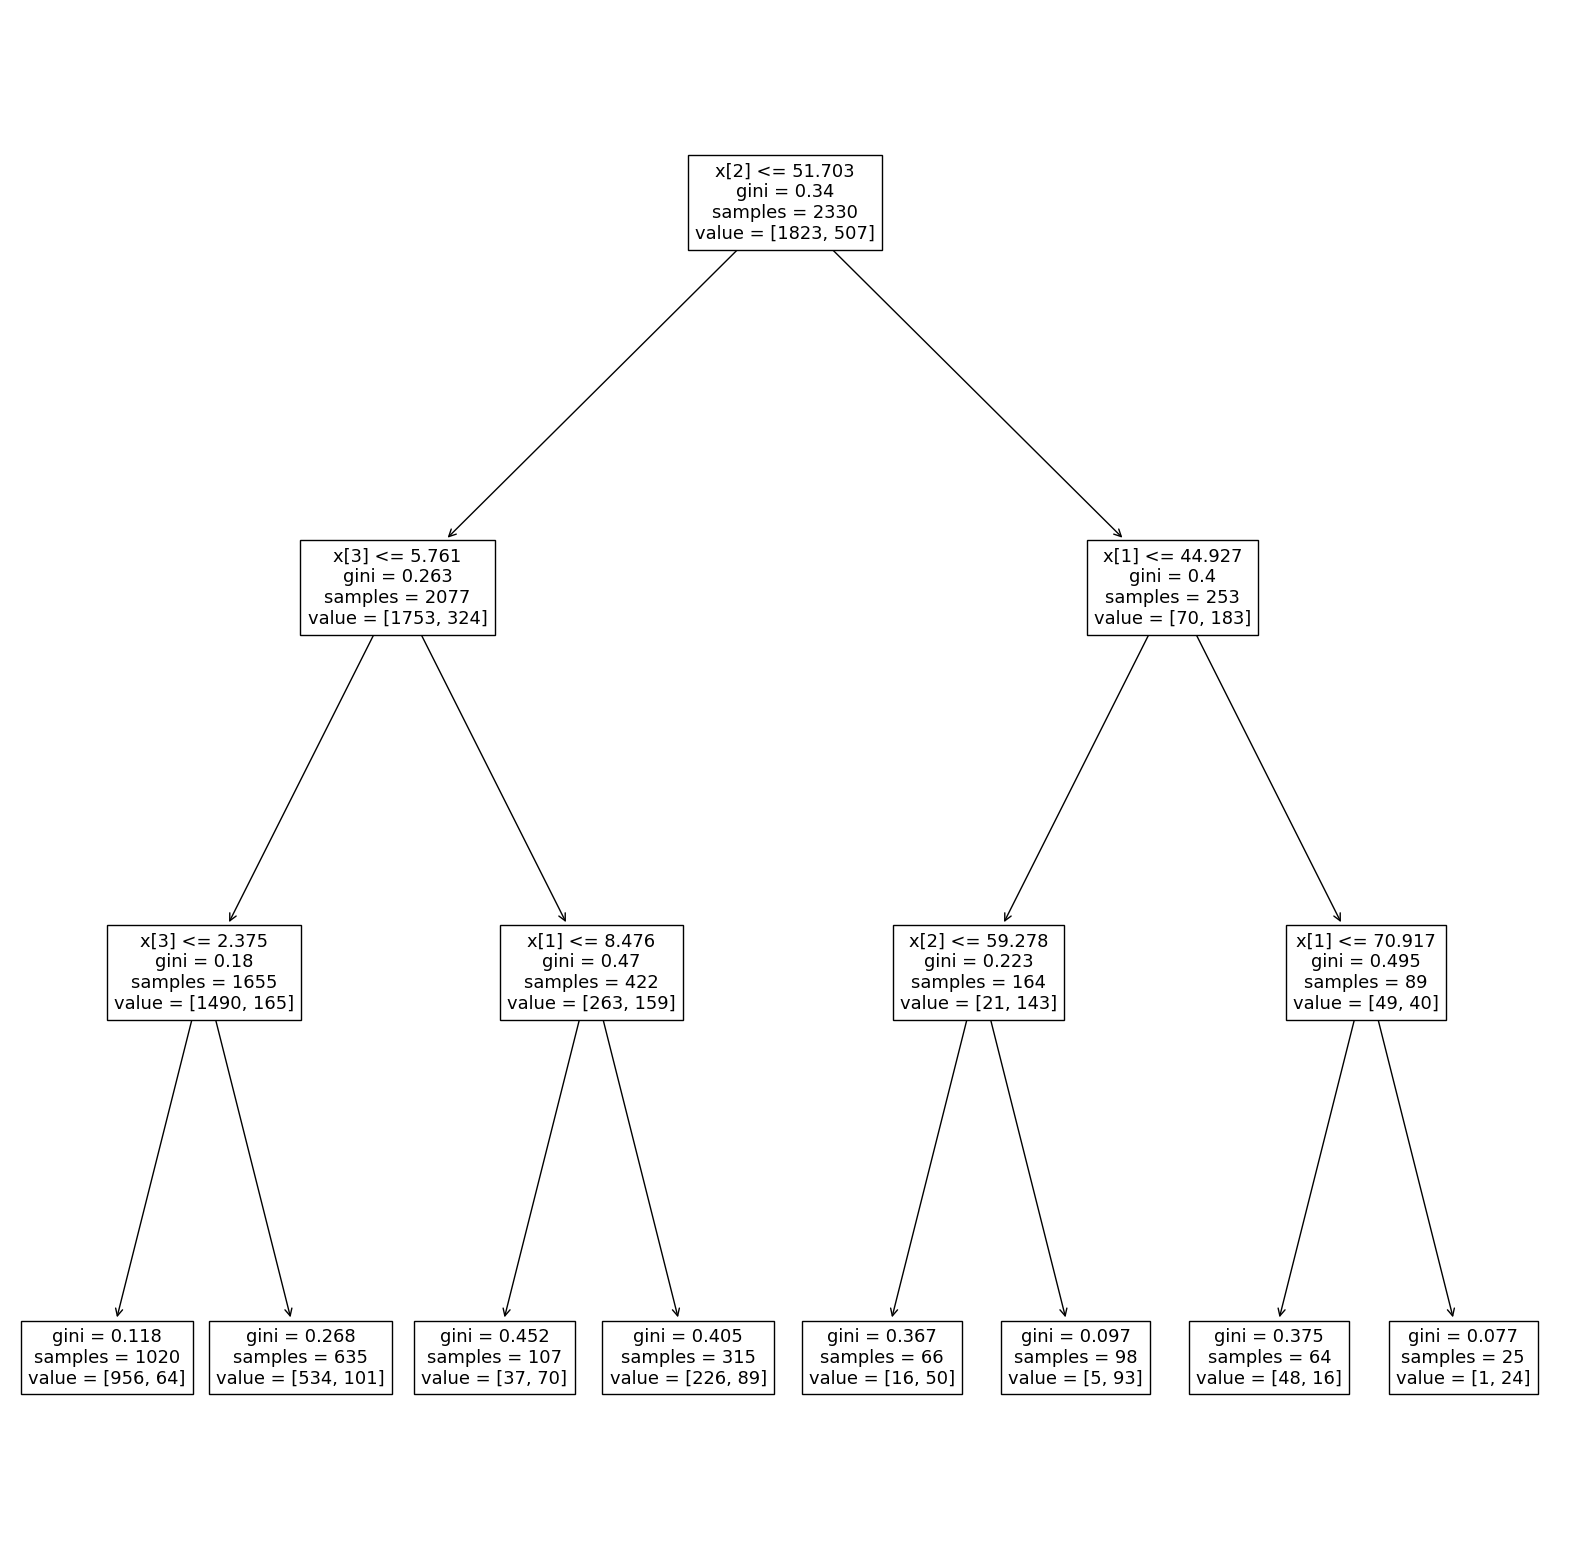

In [24]:
#conducting a decision tree with the features in race list
X_race = merged_df_no_sen[race]
y_race = merged_df_no_sen['dem_win']

X_train_race, X_test_race, y_train_race, y_test_race = train_test_split(X_race, y_race, test_size=0.25, random_state=34567)

tree_clf_race = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=1234)
tree_clf_race.fit(X_train_race, y_train_race)

f, ax =  plt.subplots(figsize=(20,20))
plot_tree(tree_clf_race, ax=ax);

In [25]:
#accuracy score on train data in from race list
tree_clf_race.score(X_train_race, y_train_race)

0.8587982832618025

In [26]:
#accuracy score on test data from race list
y_pred_race = tree_clf_race.predict(X_test_race)
acc_race = accuracy_score(y_test_race, y_pred_race)
acc_race

0.8532818532818532

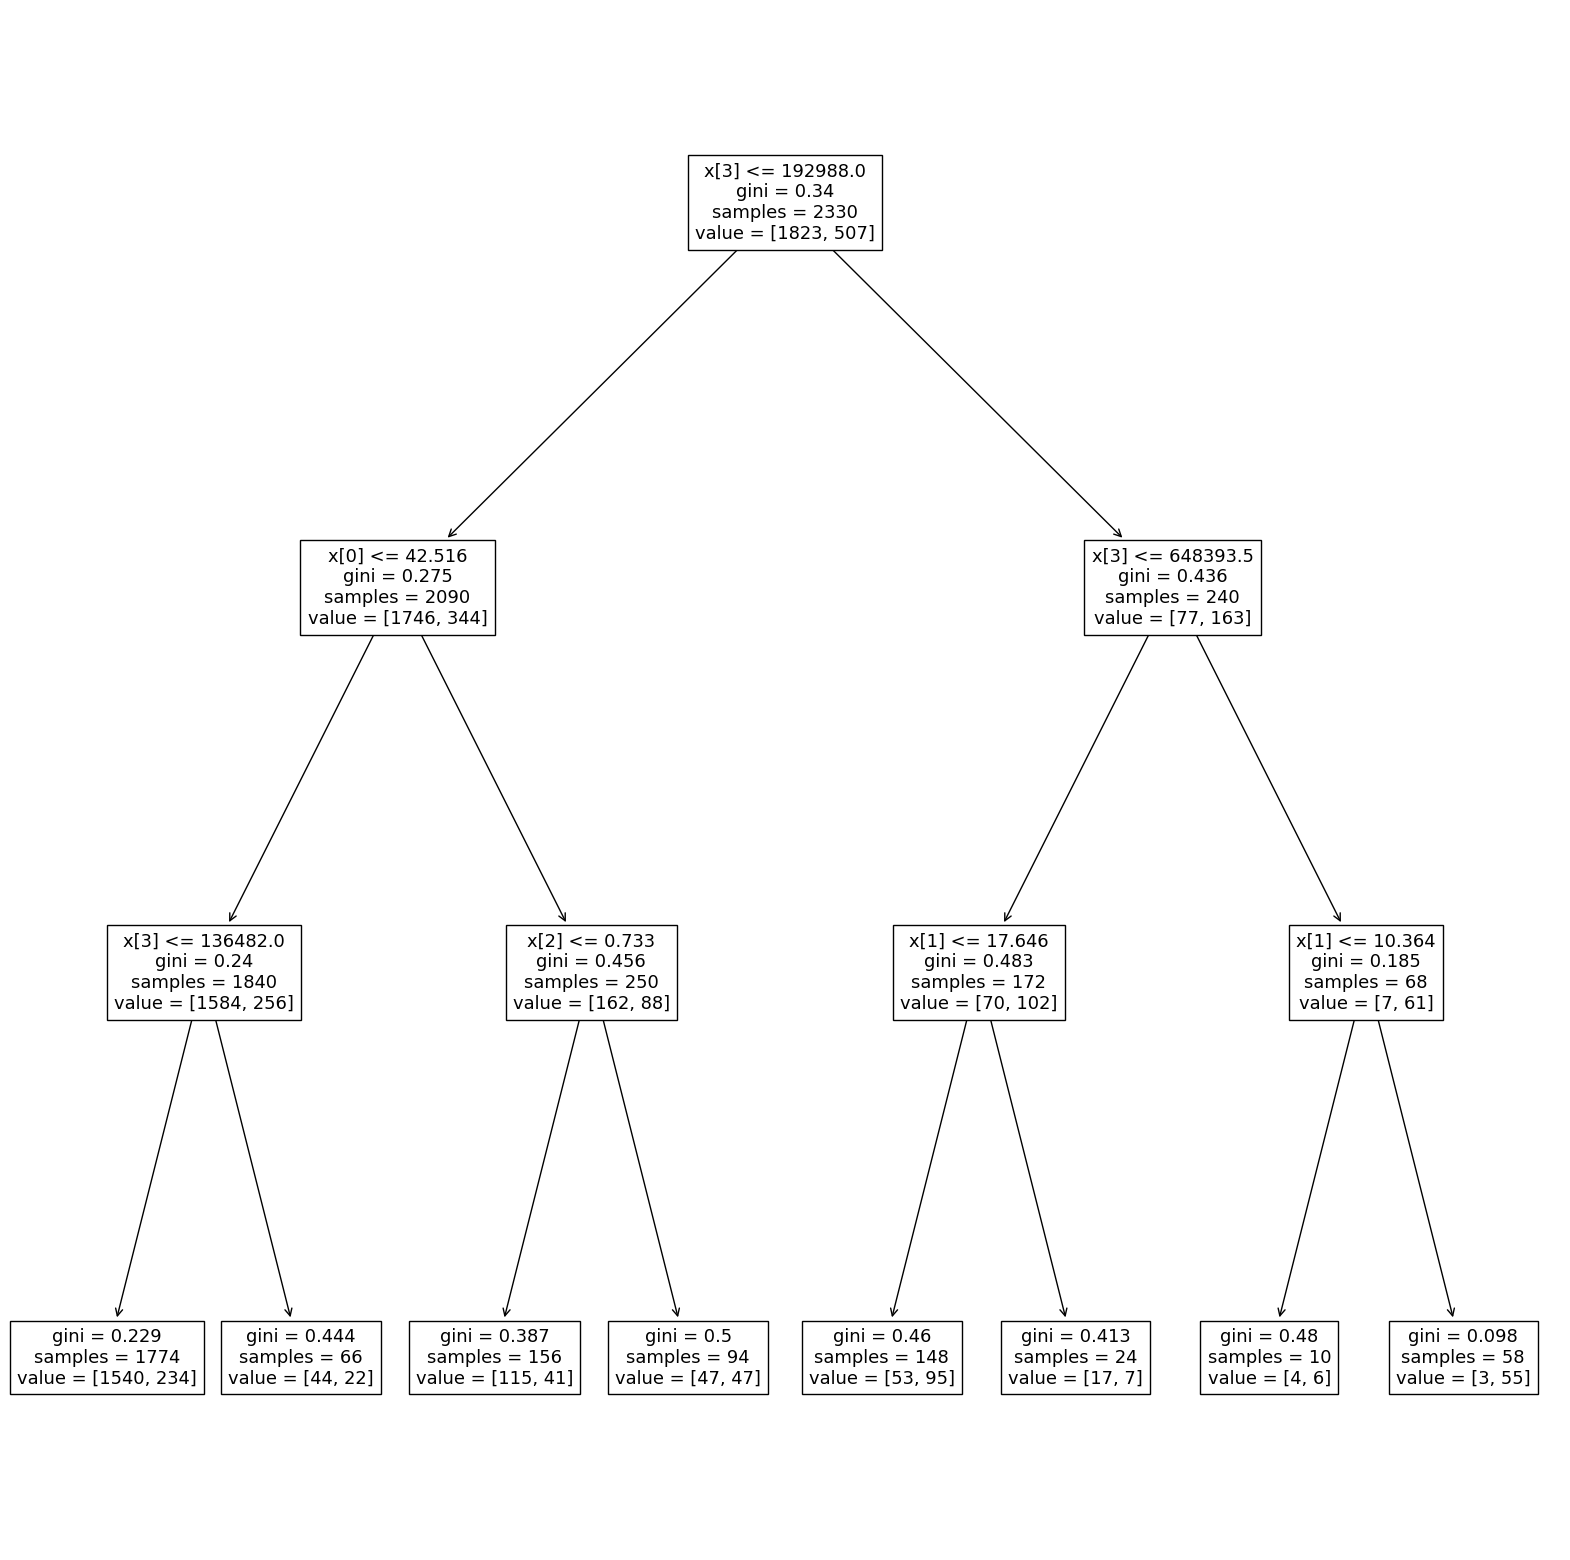

In [27]:
#conducting a decision tree with the features in age list
X_age = merged_df_no_sen[age]
y_age = merged_df_no_sen['dem_win']

X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_age, y_age, test_size=0.25, random_state=34567)

tree_clf_age = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=1234)
tree_clf_age.fit(X_train_age, y_train_age)

f, ax =  plt.subplots(figsize=(20,20))
plot_tree(tree_clf_age, ax=ax);

In [28]:
#accuracy score on train data from age list
tree_clf_age.score(X_train_age, y_train_age)

0.8236051502145922

In [29]:
#accuracy score on test data from age list
y_pred_age = tree_clf_age.predict(X_test_age)
acc_age = accuracy_score(y_test_age, y_pred_age)
acc_age

0.8352638352638353

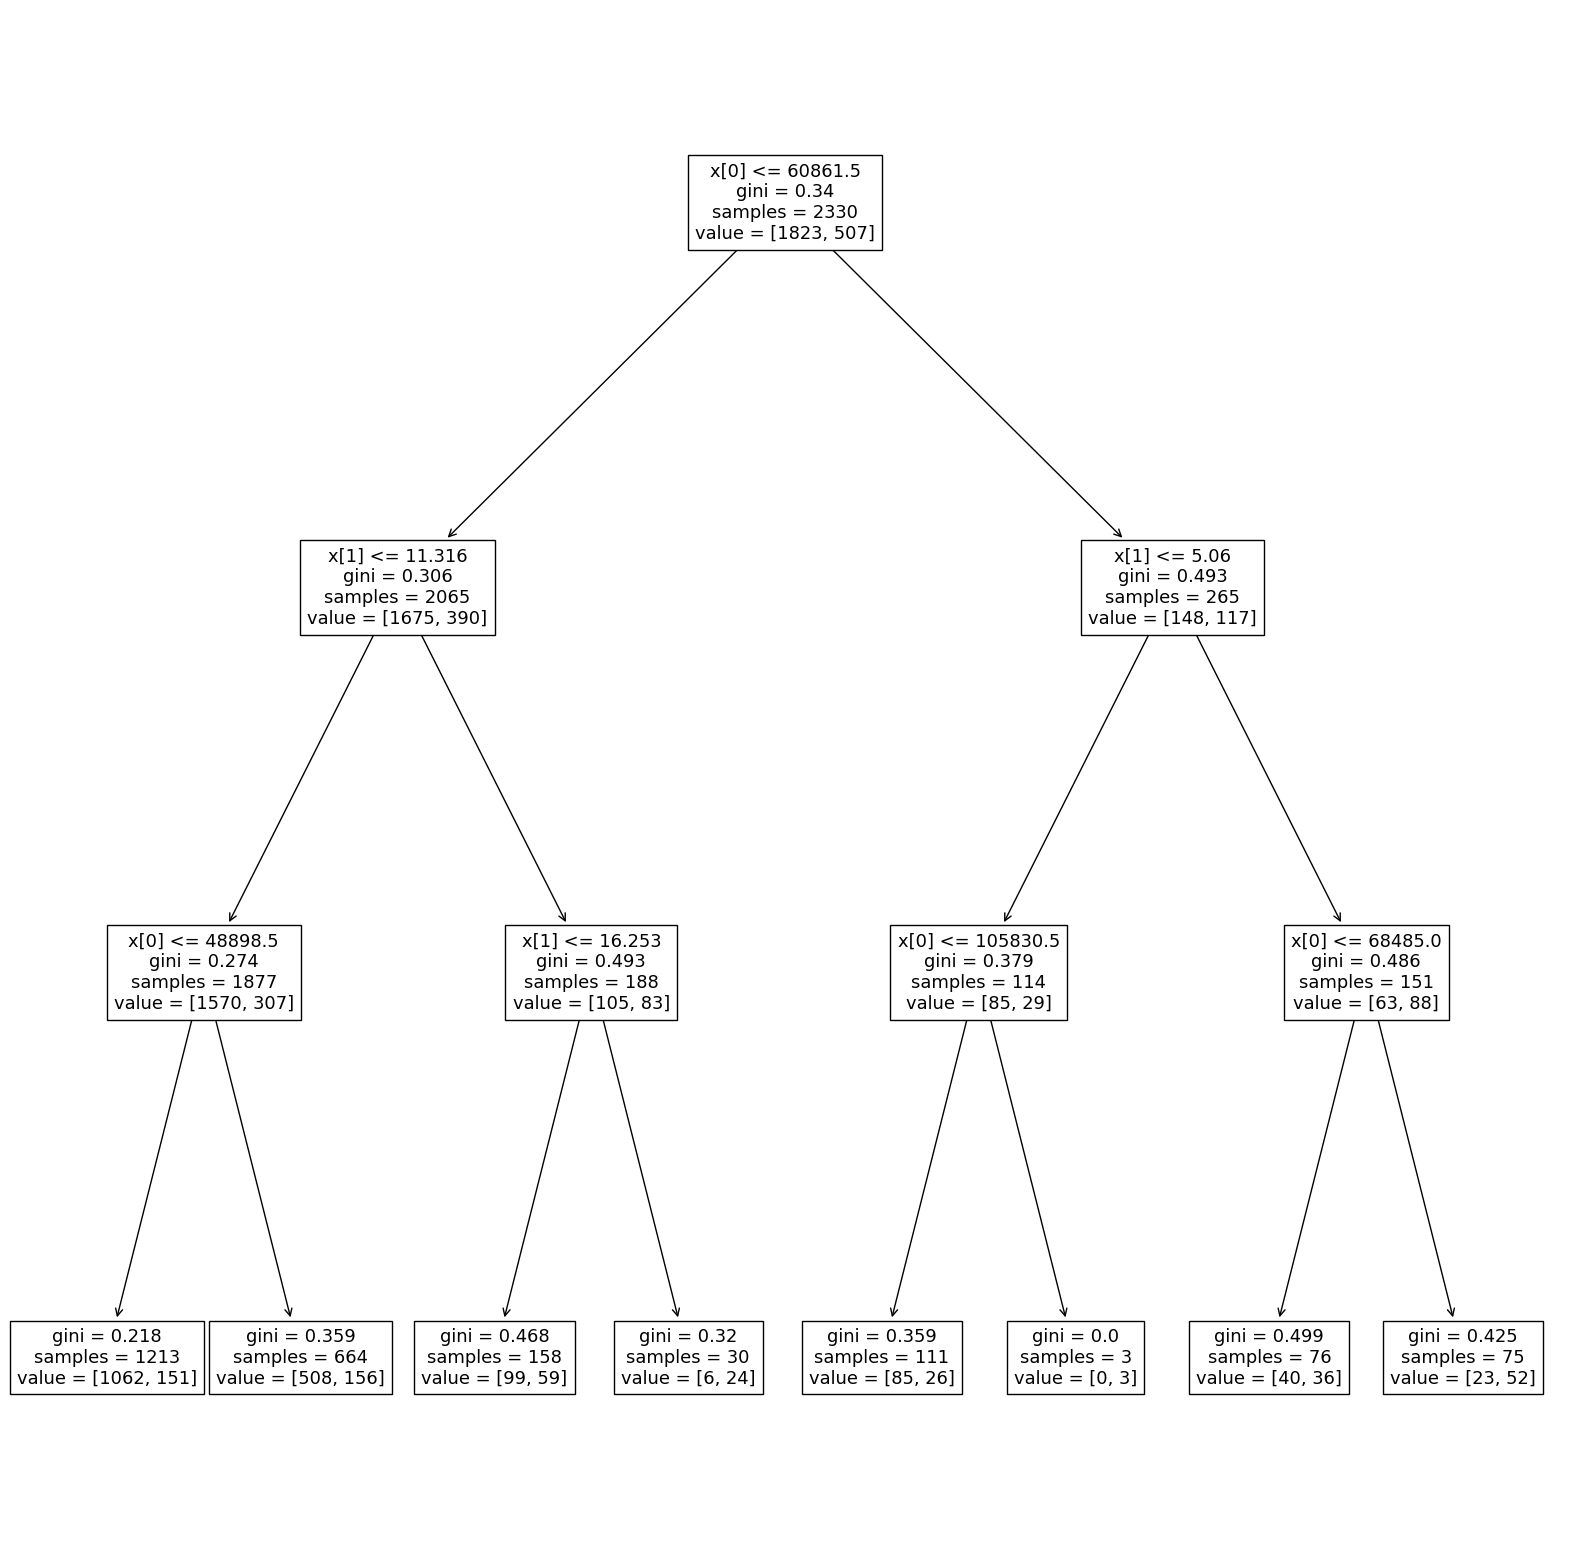

In [30]:
#conducting a decision tree with the features in the income list
X_inc = merged_df_no_sen[income]
y_inc = merged_df_no_sen['dem_win']

X_train_inc, X_test_inc, y_train_inc, y_test_inc = train_test_split(X_inc, y_inc, test_size=0.25, random_state=34567)

tree_clf_inc = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=1234)
tree_clf_inc.fit(X_train_inc, y_train_inc)

f, ax =  plt.subplots(figsize=(20,20))
plot_tree(tree_clf_inc, ax=ax);


In [31]:
#accuracy score on train data from income list
tree_clf_inc.score(X_train_inc, y_train_inc)

0.803862660944206

In [32]:
#accuracy score on test data from income list
y_pred_inc = tree_clf_inc.predict(X_test_inc)
acc_inc = accuracy_score(y_test_inc, y_pred_inc)
acc_inc

0.8159588159588159

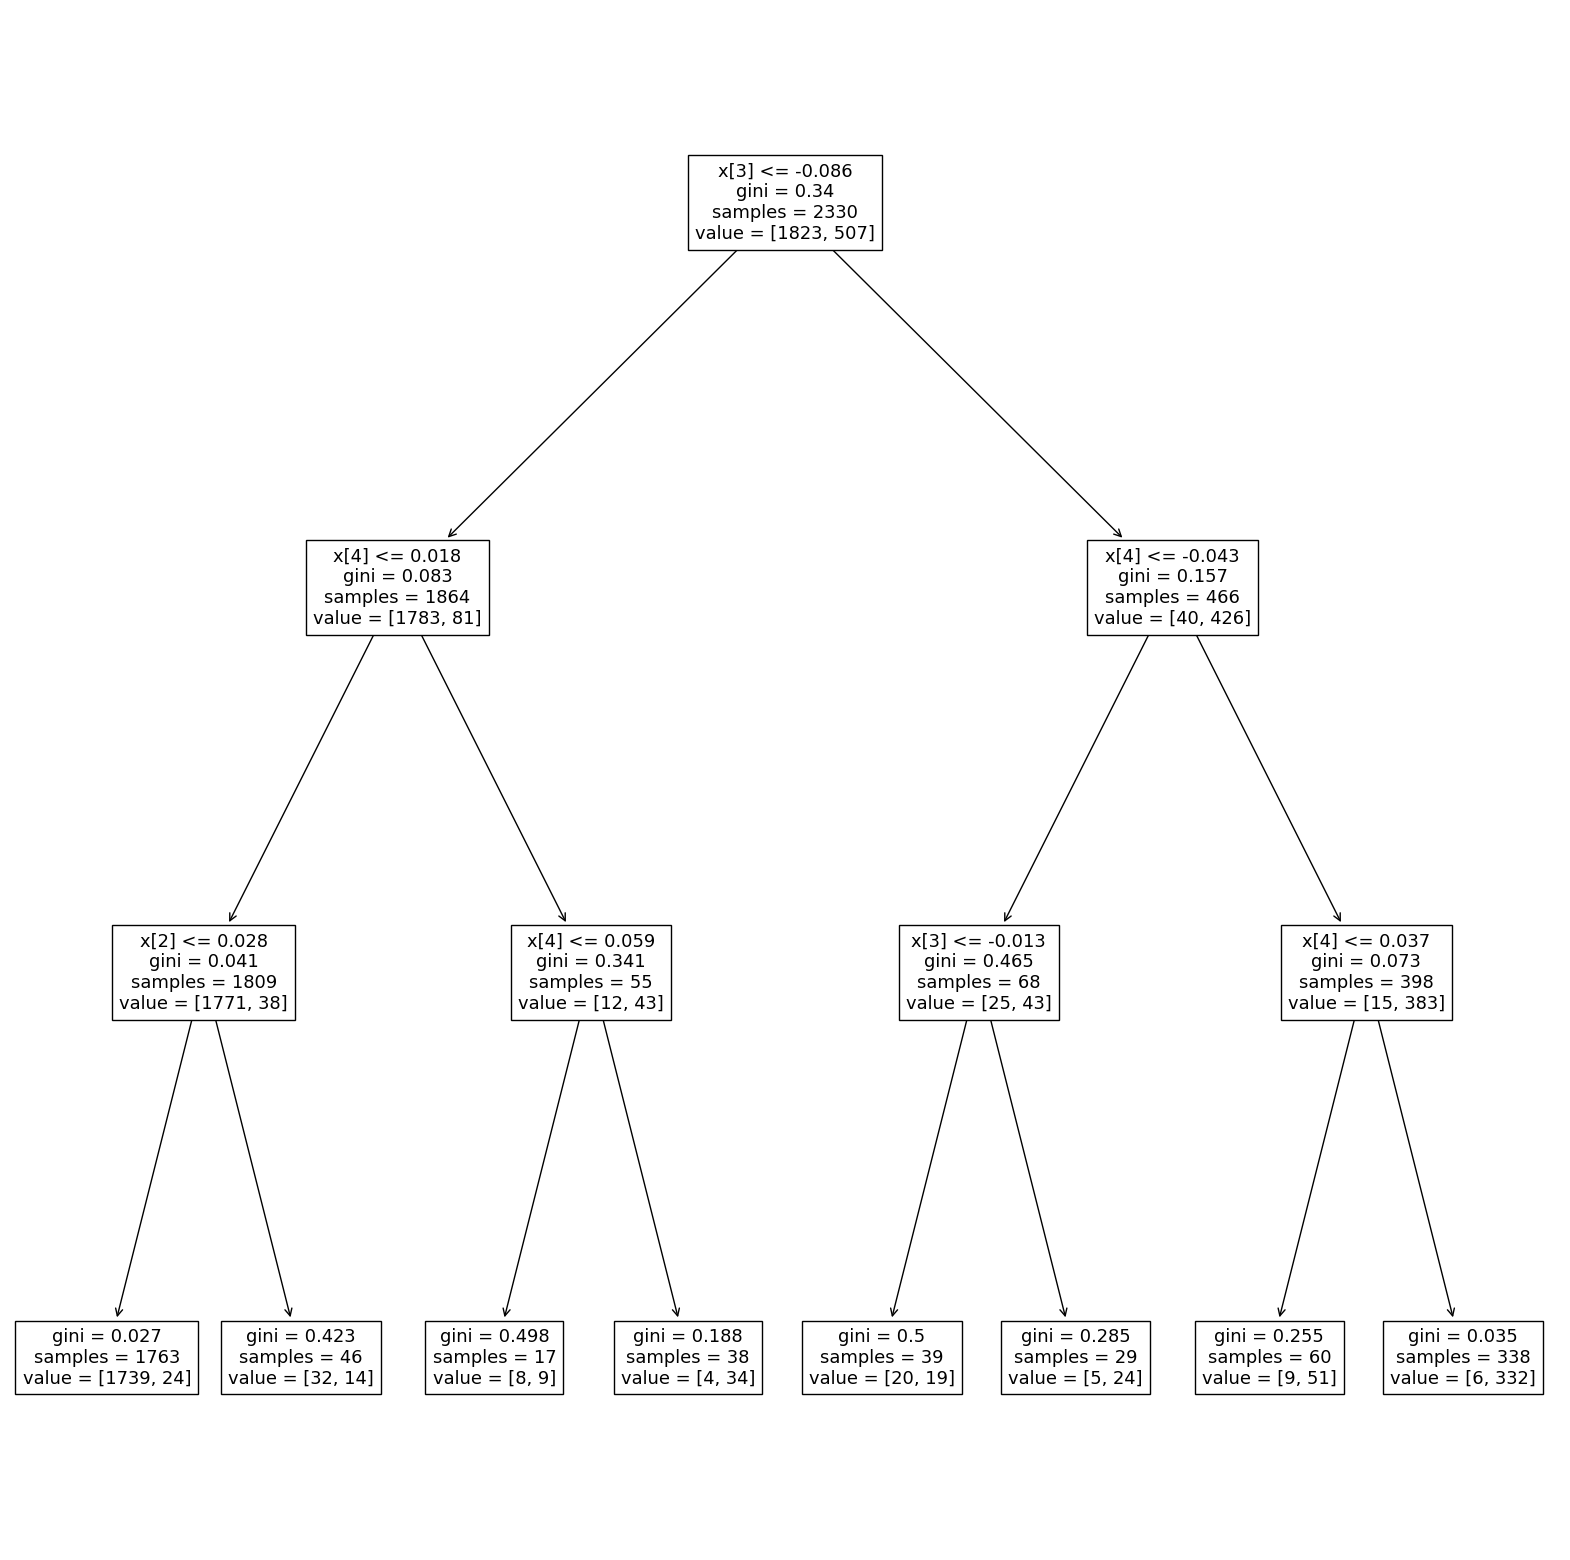

In [33]:
#using only the best features to create a decision tree
X_bf = merged_df_no_sen[['female_pct', 'lesscollege_pct', 'pres_12_mov', 'pres_16_mov', 'house_16_mov']]
y_bf = merged_df_no_sen['dem_win']

X_train_bf, X_test_bf, y_train_bf, y_test_bf = train_test_split(X_bf, y_bf, test_size=0.25, random_state=34567)

tree_clf_bf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=1234)
tree_clf_bf.fit(X_train_bf, y_train_bf)

f, ax =  plt.subplots(figsize=(20,20))
plot_tree(tree_clf_bf, ax=ax);

In [34]:
#best features accuracy score on train data
tree_clf_bf.score(X_train_bf, y_train_bf)

0.9618025751072962

In [35]:
#best features accuracy score on test data
y_pred_bf = tree_clf_bf.predict(X_test_bf)
acc_bf = accuracy_score(y_test_bf, y_pred_bf)
acc_bf

0.9601029601029601

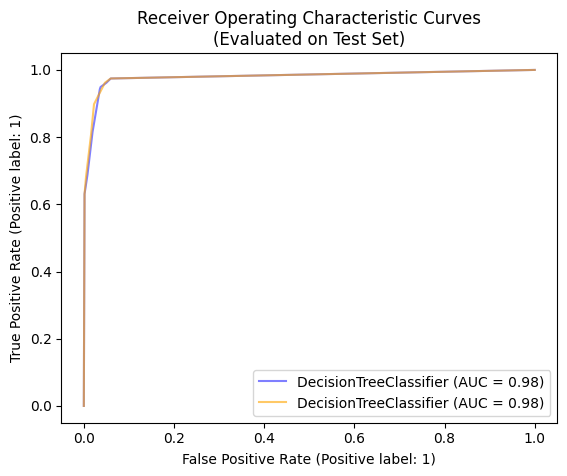

In [36]:
#creating a ROC graph to compare all the feature model to the best feature model 
fig, ax = plt.subplots()

RocCurveDisplay.from_estimator(tree_clf, X_test, y_test, ax=ax, alpha=0.5, color="blue")
RocCurveDisplay.from_estimator(tree_clf_bf, X_test_bf, y_test_bf, ax=ax, alpha=0.6, color="orange")
# RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax, alpha=0.8)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3114 non-null   object 
 1   county                  3114 non-null   object 
 2   fips                    3114 non-null   int64  
 3   trump16                 3114 non-null   int64  
 4   clinton16               3114 non-null   int64  
 5   otherpres16             3114 non-null   int64  
 6   romney12                3114 non-null   int64  
 7   obama12                 3114 non-null   int64  
 8   otherpres12             3114 non-null   int64  
 9   demsen16                1942 non-null   float64
 10  repsen16                1942 non-null   float64
 11  othersen16              1942 non-null   float64
 12  demhouse16              2862 non-null   float64
 13  rephouse16              2862 non-null   float64
 14  otherhouse16            2862 non-null   

/var/folders/wr/g705p4v548q9pr0f6xzqsgmw0000gn/T/ipykernel_1339/1592588670.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  crossval_df = crossval_df._append(cross_validation(X_train, y_train, c, 10), ignore_index = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   c           9 non-null      float64
 1   train       9 non-null      float64
 2   validation  9 non-null      float64
dtypes: float64(3)
memory usage: 344.0 bytes


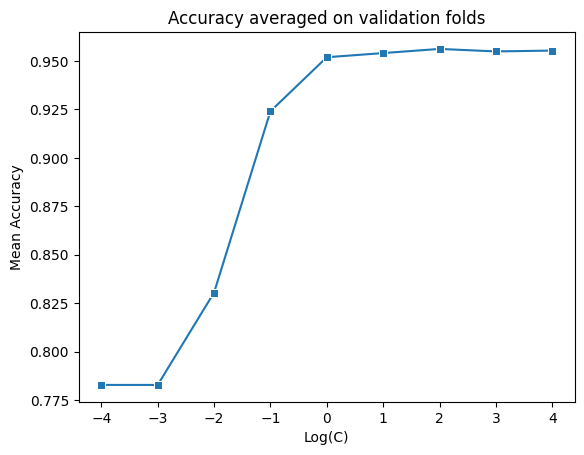

Training Precision:  0.9129554655870445
Testing Precision:  0.9310344827586207



Training Recall:  0.8913043478260869
Testing Recall:  0.8544303797468354



Training Accuracy:  0.9579399141630901
Testing Accuracy:  0.9575289575289575



Training F1-Score:  0.9019999999999999
Testing F1-Score:  0.8910891089108911


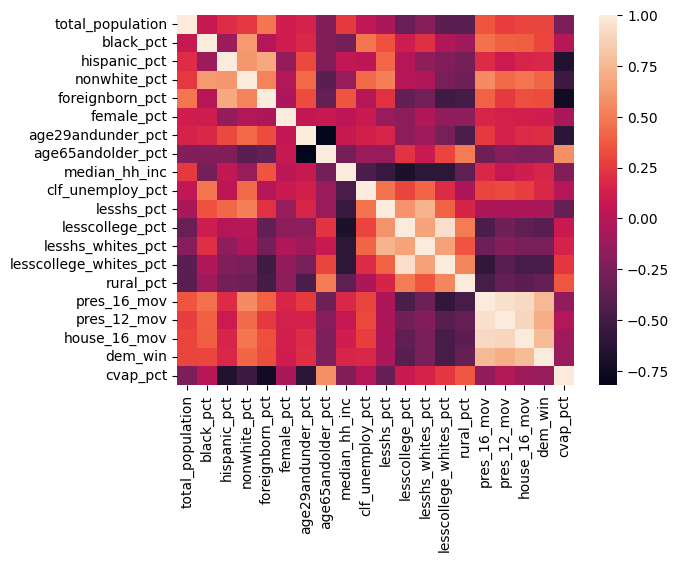

/var/folders/wr/g705p4v548q9pr0f6xzqsgmw0000gn/T/ipykernel_1339/3859422886.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  crossval_df_l1 = crossval_df_l1._append(cross_validation_l1(X_train, y_train, c, 10), ignore_index = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   c           9 non-null      float64
 1   train       9 non-null      float64
 2   validation  9 non-null      float64
dtypes: float64(3)
memory usage: 344.0 bytes


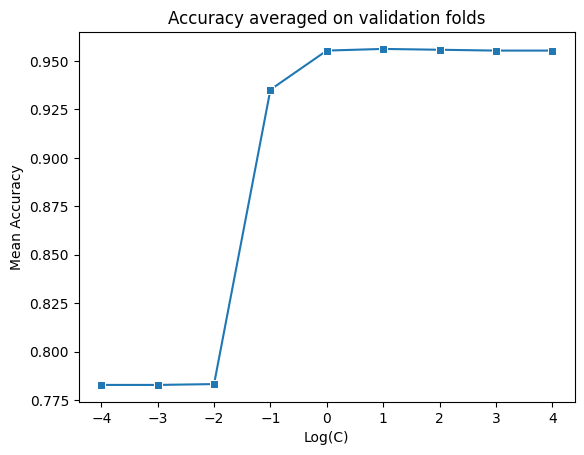

Training Precision:  0.9129554655870445
Testing Precision:  0.9310344827586207



Training Recall:  0.8913043478260869
Testing Recall:  0.8544303797468354



Training Accuracy:  0.9579399141630901
Testing Accuracy:  0.9575289575289575



Training F1-Score:  0.9019999999999999
Testing F1-Score:  0.8910891089108911
Optimal number of features: 7
Feature ranking:  [13  5  9  6  4  1  8  7 12 11  2  1  1  3 10  1  1  1  1]
All features:  19
['total_population' 'black_pct' 'hispanic_pct' 'nonwhite_pct'
 'foreignborn_pct' 'female_pct' 'age29andunder_pct' 'age65andolder_pct'
 'median_hh_inc' 'clf_unemploy_pct' 'lesshs_pct' 'lesscollege_pct'
 'lesshs_whites_pct' 'lesscollege_whites_pct' 'rural_pct' 'pres_16_mov'
 'pres_12_mov' 'house_16_mov' 'cvap_pct']
Selected best:  7
['female_pct' 'lesscollege_pct' 'lesshs_whites_pct' 'pres_16_mov'
 'pres_12_mov' 'house_16_mov' 'cvap_pct']
<class 'pandas.core.frame.DataFrame'>
Index: 3107 entries, 0 to 3110
Data columns (total 7 columns):
 #   Column       

/var/folders/wr/g705p4v548q9pr0f6xzqsgmw0000gn/T/ipykernel_1339/798480721.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  crossval_df = crossval_df._append(cross_validation(X_train, y_train, c, 10), ignore_index = True)


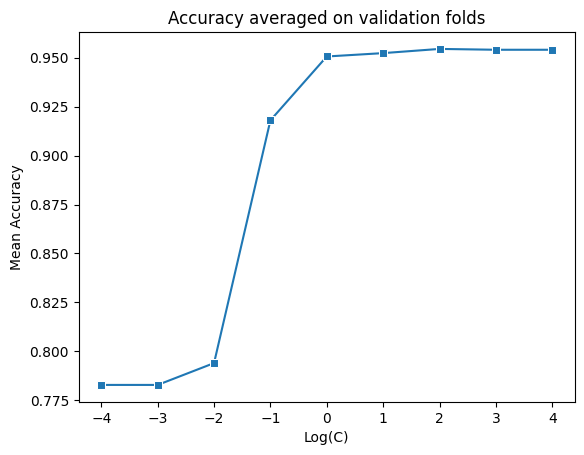

Training Precision:  0.9065040650406504
Testing Precision:  0.9290780141843972



Training Recall:  0.8814229249011858
Testing Recall:  0.8291139240506329



Training Accuracy:  0.9545064377682403
Testing Accuracy:  0.9523809523809523



Training F1-Score:  0.8937875751503006
Testing F1-Score:  0.8762541806020065


/var/folders/wr/g705p4v548q9pr0f6xzqsgmw0000gn/T/ipykernel_1339/510066189.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  crossval_df = crossval_df._append(cross_validation(X_train, y_train, c, 10), ignore_index = True)


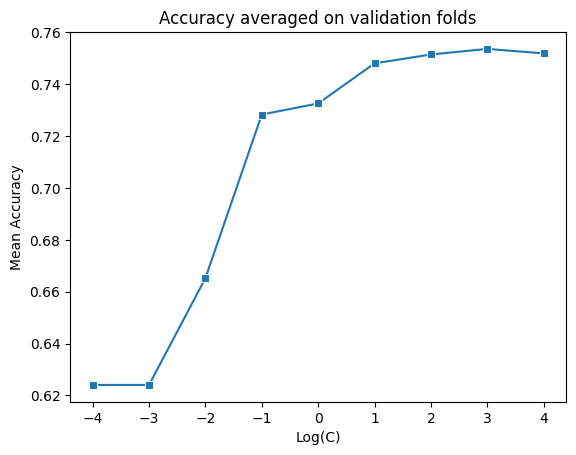

Training Precision:  0.7626609442060086
Testing Precision:  0.7747747747747747



Training Recall:  0.7626609442060086
Testing Recall:  0.7747747747747747



Training Accuracy:  0.7626609442060086
Testing Accuracy:  0.7747747747747747



Training F1-Score:  0.7626609442060086
Testing F1-Score:  0.7747747747747747


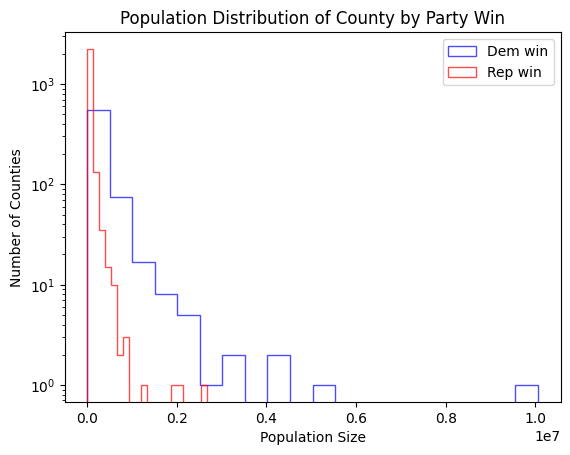

In [37]:
%run Noahworkspace.ipynb

In [38]:
#created new columns called "target_mov" and "mov_scale" for the 2018 election results 
mov_df

,total_population,cvap,black_pct,hispanic_pct,nonwhite_pct,foreignborn_pct,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,pres_16_mov,pres_12_mov,house_16_mov,target_mov,mov_scale
0,55049.0,40690.0,18.370906,2.572254,24.316518,1.838362,51.176225,40.037058,13.978456,53099.0,5.591657,12.417046,75.407229,10.002112,74.065601,42.002162,-0.489969,-0.460304,-0.280756,-0.365065,1
1,199510.0,151770.0,9.225603,4.366698,16.821212,3.269510,51.194928,35.474412,18.714851,51365.0,6.286843,9.972418,70.452889,7.842227,68.405607,42.279099,-0.571601,-0.557688,-0.571601,-0.542381,1
2,26614.0,20375.0,47.888329,4.309762,54.114376,2.859397,46.498084,37.664387,16.528895,33956.0,12.824738,26.235928,87.132213,19.579752,81.364746,67.789635,-0.055688,0.031454,0.100637,-0.003471,3
3,22572.0,17590.0,21.212121,2.223994,25.234804,1.351232,46.464646,37.329435,14.885699,39776.0,7.146827,19.301587,88.000000,15.020490,87.471774,68.352607,-0.551536,-0.466746,-0.542860,-0.545269,1
4,57704.0,42430.0,1.557951,8.727298,12.342299,4.271801,50.485235,37.240053,17.192916,46212.0,5.953833,19.968585,86.950243,16.643368,86.163610,89.951502,-0.809090,-0.740940,-0.805394,-0.797432,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,44812.0,30565.0,0.865840,15.859591,20.184326,5.509685,47.824244,44.153352,9.417120,68233.0,5.072255,9.314606,78.628507,6.238463,76.606813,10.916313,-0.520899,-0.393844,-0.155873,-0.293343,1
3107,22623.0,16335.0,0.614419,15.174822,18.799452,11.475048,48.097069,35.569995,11.837510,75594.0,2.123447,4.633570,46.211584,1.526877,41.769504,46.430920,0.268710,0.118196,0.236655,0.303734,6
3108,20893.0,14355.0,0.186665,8.959939,12.281625,3.986981,49.327526,43.205858,10.678218,53323.0,6.390755,10.361224,81.793082,8.806312,81.080852,43.095937,-0.584652,-0.584026,-0.450408,-0.525713,1
3109,8351.0,6135.0,0.790325,13.962400,17.602682,3.783978,51.359119,34.774279,19.650341,46212.0,7.441860,12.577108,78.923920,10.299738,75.980688,35.954529,-0.623755,-0.562880,-0.500388,-0.542005,1


In [39]:
#defining the new target and feature variables 
X = mov_df.drop(columns= ['mov_scale', 'target_mov'], axis=1)
y =  mov_df['mov_scale']

In [40]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123456789)

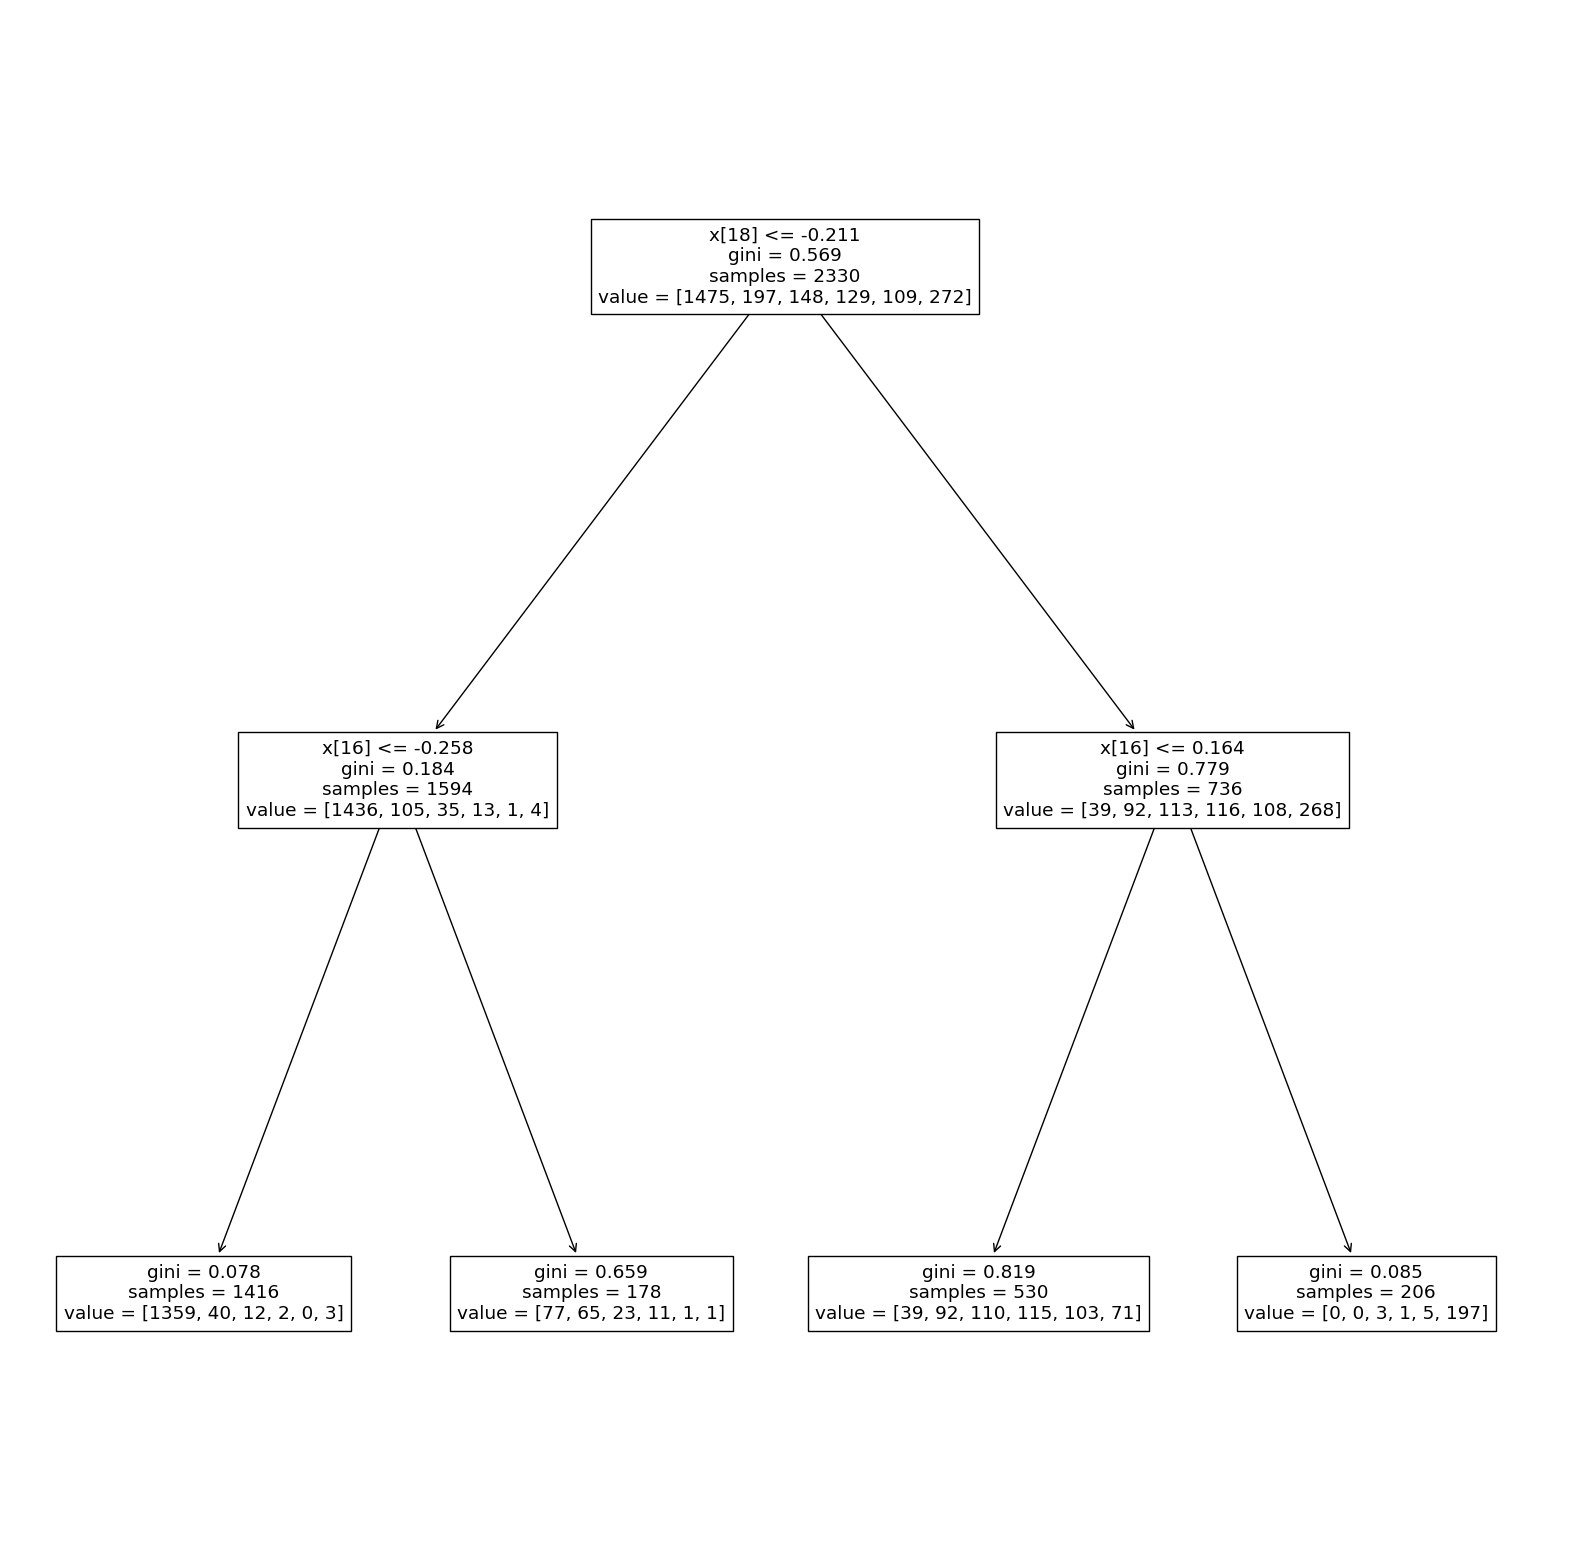

In [41]:
#creating a decision tree 
clf = DecisionTreeClassifier(criterion="gini", max_depth=2, random_state=1234)
clf.fit(X_train, y_train)

f, ax =  plt.subplots(figsize=(20,20))
plot_tree(clf, ax=ax);

In [42]:
#the accuracy score on the train set
clf.score(X_train, y_train)

0.7502145922746781

In [43]:
#accuracy score on the test set
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.7104247104247104

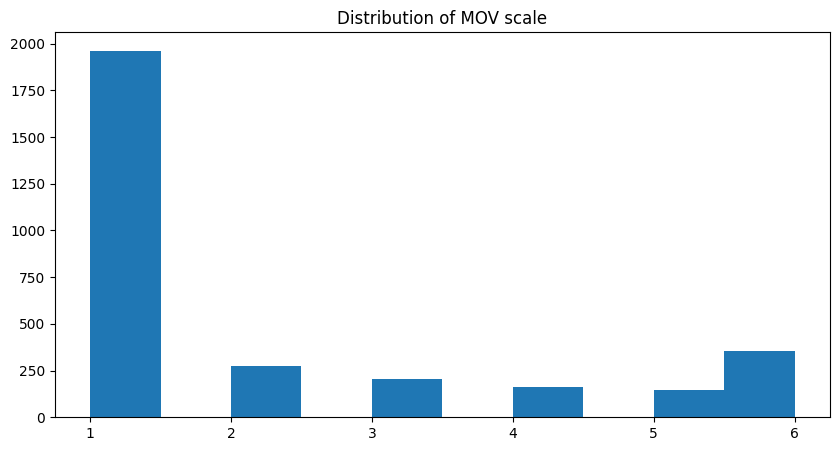

In [44]:
#plotting the distribution of the values in mov_scale
fig, ax = plt.subplots(1, figsize=(10,5))
z = mov_df["mov_scale"]
ax.hist(z)
ax.set_title("Distribution of MOV scale");

In [45]:
#count of unique values in the mov_scale column 
mov_df['mov_scale'].value_counts()

mov_scale
1    1963
6     355
2     277
3     203
4     162
5     147
Name: count, dtype: int64

In [46]:
# mov_df[mov_df['mov_scale'] == 0].sort_values(by='mov_scale', ascending=False)

In [47]:
# mov_df.sort_values(by="total_population", ascending=False).tail()

In [48]:
# county_data[county_data['total_population'] == 2664418.0]

In [49]:
#creating new column called cvap_pct. Divided the values in cvap by total_population
mov_df['cvap_pct'] =  mov_df['cvap']/mov_df['total_population']
mov_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3107 entries, 0 to 3110
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_population        3107 non-null   float64
 1   cvap                    3107 non-null   float64
 2   black_pct               3107 non-null   float64
 3   hispanic_pct            3107 non-null   float64
 4   nonwhite_pct            3107 non-null   float64
 5   foreignborn_pct         3107 non-null   float64
 6   female_pct              3107 non-null   float64
 7   age29andunder_pct       3107 non-null   float64
 8   age65andolder_pct       3107 non-null   float64
 9   median_hh_inc           3107 non-null   float64
 10  clf_unemploy_pct        3107 non-null   float64
 11  lesshs_pct              3107 non-null   float64
 12  lesscollege_pct         3107 non-null   float64
 13  lesshs_whites_pct       3107 non-null   float64
 14  lesscollege_whites_pct  3107 non-null   float

In [50]:
#dropping the columns to create a dataframe only including the best features
dropping = ['total_population', 'cvap', 'black_pct', 'hispanic_pct', 'nonwhite_pct', 'foreignborn_pct', 'age29andunder_pct',
           'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct', 'lesscollege_whites_pct',
           'rural_pct', 'lesshs_whites_pct']
sub_mov_df = mov_df.drop(columns = dropping, axis=1)
sub_mov_df

,female_pct,lesscollege_pct,pres_16_mov,pres_12_mov,house_16_mov,target_mov,mov_scale,cvap_pct
0,51.176225,75.407229,-0.489969,-0.460304,-0.280756,-0.365065,1,0.739160
1,51.194928,70.452889,-0.571601,-0.557688,-0.571601,-0.542381,1,0.760714
2,46.498084,87.132213,-0.055688,0.031454,0.100637,-0.003471,3,0.765575
3,46.464646,88.000000,-0.551536,-0.466746,-0.542860,-0.545269,1,0.779284
4,50.485235,86.950243,-0.809090,-0.740940,-0.805394,-0.797432,1,0.735304
...,...,...,...,...,...,...,...,...
3106,47.824244,78.628507,-0.520899,-0.393844,-0.155873,-0.293343,1,0.682072
3107,48.097069,46.211584,0.268710,0.118196,0.236655,0.303734,6,0.722053
3108,49.327526,81.793082,-0.584652,-0.584026,-0.450408,-0.525713,1,0.687072
3109,51.359119,78.923920,-0.623755,-0.562880,-0.500388,-0.542005,1,0.734643


In [51]:
#defining the target and feature variables 
X = sub_mov_df.drop(columns= ['mov_scale', 'target_mov'], axis=1)
y = sub_mov_df['mov_scale']

In [52]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123456)

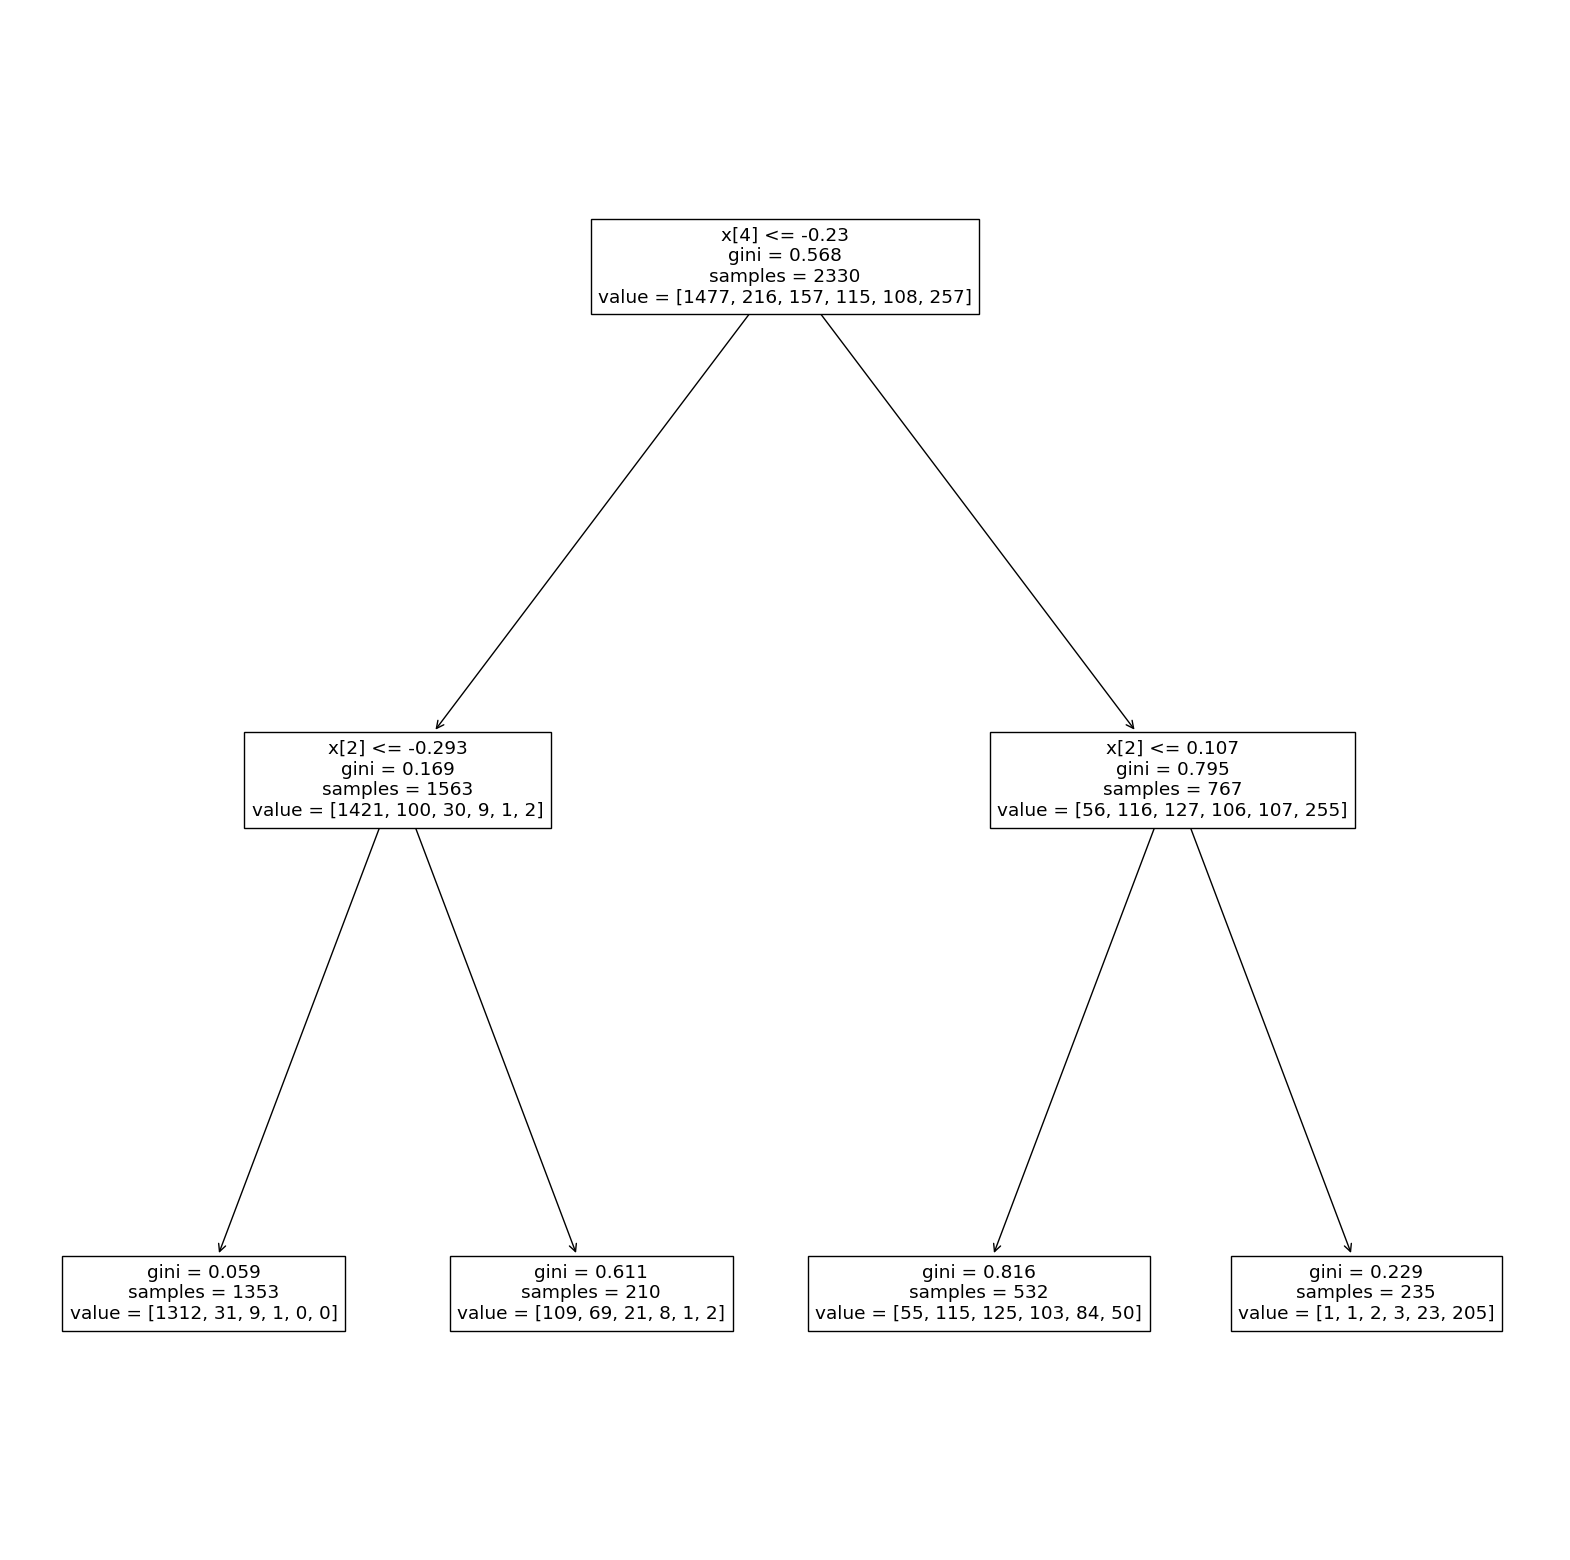

In [53]:
#creating a decision tree with the best features but this time with 'mov_scale' as the target variable
clf = DecisionTreeClassifier(criterion="gini", max_depth=2, random_state=1234)
clf.fit(X_train, y_train)

f, ax =  plt.subplots(figsize=(20,20))
plot_tree(clf, ax=ax);

In [54]:
#accuracy score on train set
clf.score(X_train, y_train)

0.7515021459227468

In [55]:
#accuracy score on test set
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.731016731016731

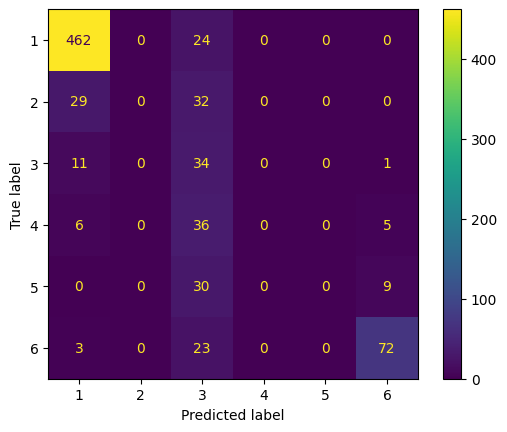

In [56]:
#creating a confusion matrix for the decision tree model 
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test);

In [57]:
#accuracy score on the test data
accuracy_score(y_test, y_pred)

0.731016731016731

In [58]:
#summarized classifcation report for best features and with 'mov_scale' as the target variable
print(classification_report(y_test, y_pred, target_names=["1", "2", "3", "4", "5", "6"]))

              precision    recall  f1-score   support

           1       0.90      0.95      0.93       486
           2       0.00      0.00      0.00        61
           3       0.19      0.74      0.30        46
           4       0.00      0.00      0.00        47
           5       0.00      0.00      0.00        39
           6       0.83      0.73      0.78        98

    accuracy                           0.73       777
   macro avg       0.32      0.40      0.33       777
weighted avg       0.68      0.73      0.70       777



/Users/julieleung/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/julieleung/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/julieleung/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [69]:
clf.classes_

array([1, 2, 3, 4, 5, 6])

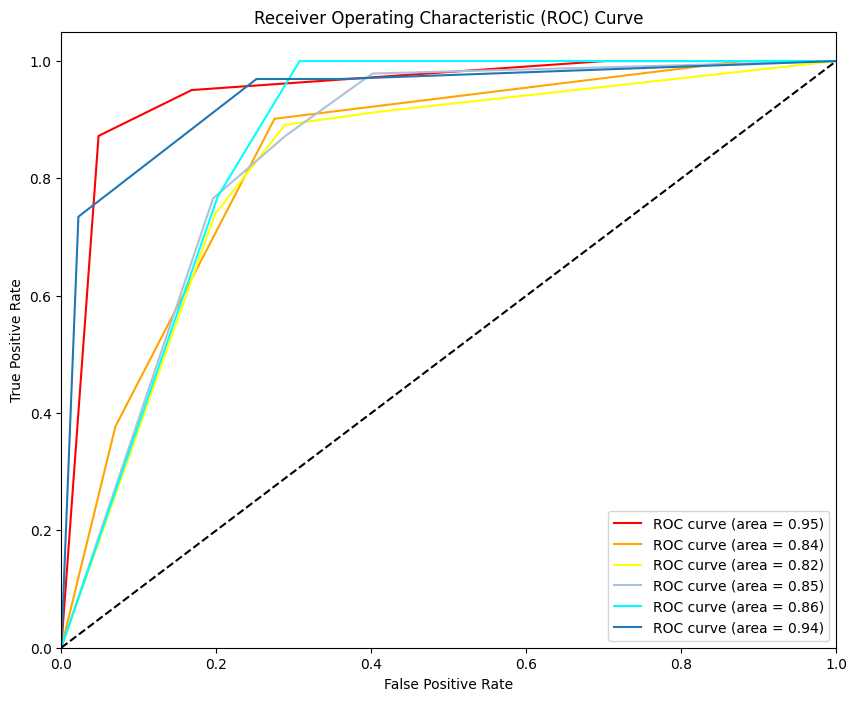

In [104]:
#creating a ROC graph for the Decision Tree model

# Create an instance of the DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1234)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Convert the multi-class labels into binary format
y_test_binary = label_binarize(y_test, classes=clf.classes_)

# Get the predicted probabilities for each class
y_pred_prob = clf.predict_proba(X_test)

# Compute the false positive rate, true positive rate, and thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(clf.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['red', 'orange', 'yellow', '#acc2d9', 'aqua', '#1f77b4']
for i in range(len(clf.classes_)):
    plt.plot(fpr[i], tpr[i], color=colors[i], label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [70]:
#using the same X and y and splitting the dataset above, we are scaling the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
#conducting a knn model on the train data
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [72]:
#predicting the y values on the x test data
y_pred = knn.predict(X_test)

In [73]:
#accuracy score on the y values 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.797940797940798


In [74]:
#using cross-validation to get the best k-values
k_values = [i for i in range (1,100)]
scores = []

scaler = MinMaxScaler() #StandardScaler()
X_train = scaler.fit_transform(X_train)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))
# scores

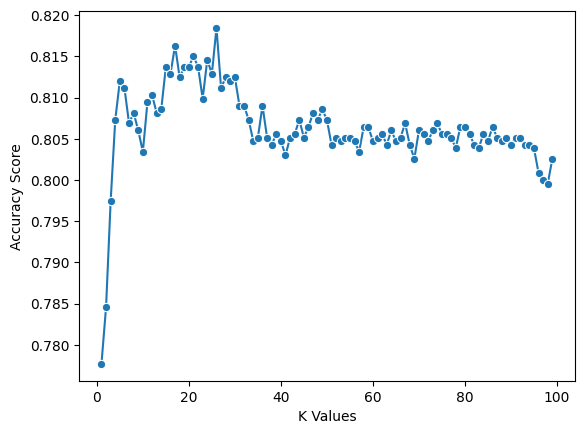

In [75]:
#plotting the best k-values
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score");

In [76]:
sub_mov_df.head()

,female_pct,lesscollege_pct,pres_16_mov,pres_12_mov,house_16_mov,target_mov,mov_scale,cvap_pct
0,51.176225,75.407229,-0.489969,-0.460304,-0.280756,-0.365065,1,0.739160
1,51.194928,70.452889,-0.571601,-0.557688,-0.571601,-0.542381,1,0.760714
2,46.498084,87.132213,-0.055688,0.031454,0.100637,-0.003471,3,0.765575
3,46.464646,88.000000,-0.551536,-0.466746,-0.542860,-0.545269,1,0.779284
4,50.485235,86.950243,-0.809090,-0.740940,-0.805394,-0.797432,1,0.735304


In [77]:
#defining the target/feature variables and splitting the dataset
X = sub_mov_df.drop(columns= ['mov_scale', 'target_mov'], axis=1)
y = sub_mov_df['mov_scale']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123456)

In [78]:
#doing a cross-validation on the knn model 
def cross_validation_post_rfe(X_train, y_train, k, num_split = 10):
    
    X_train = X_train.values
    y_train = y_train.values
    
    score_train_list = []
    score_val_list = []
    
    for train_index, valid_index in KFold(n_splits = num_split).split(X_train):

        #train and validation splitting 
        X_train_fold, X_val_fold = X_train[train_index], X_train[valid_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[valid_index]
        scaler = MinMaxScaler()
        X_tf_sc = scaler.fit_transform(X_train_fold)
        X_vld_sc = scaler.transform(X_val_fold)

        #create/fit k-nearest neighbor
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_tf_sc, y_train_fold)

        accuracy_train = knn.score(X_tf_sc, y_train_fold)
        accuracy_val = knn.score(X_vld_sc, y_val_fold)
        score_val_list.append(accuracy_val)
        score_train_list.append(accuracy_train)
        
    return {'k': k, 'train': np.mean(score_train_list), 'validation': np.mean(score_val_list)}

In [79]:
#creating a dataframe for the cross-validation/knn
crossval_df = pd.DataFrame(columns = ['k', 'train', 'validation'])
for k in np.arange(1,100):
    crossval_df = crossval_df._append(cross_validation(X_train, y_train, k, 5), ignore_index = True)

/var/folders/wr/g705p4v548q9pr0f6xzqsgmw0000gn/T/ipykernel_1339/1065314858.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  crossval_df = crossval_df._append(cross_validation(X_train, y_train, k, 5), ignore_index = True)


In [80]:
#the cross-validation/knn dataframe
crossval_df.head()

,k,train,validation,c
0,NaN,0.739056,0.739485,1.0
1,NaN,0.740129,0.739485,2.0
2,NaN,0.740880,0.739056,3.0
3,NaN,0.740880,0.740343,4.0
4,NaN,0.741202,0.741631,5.0


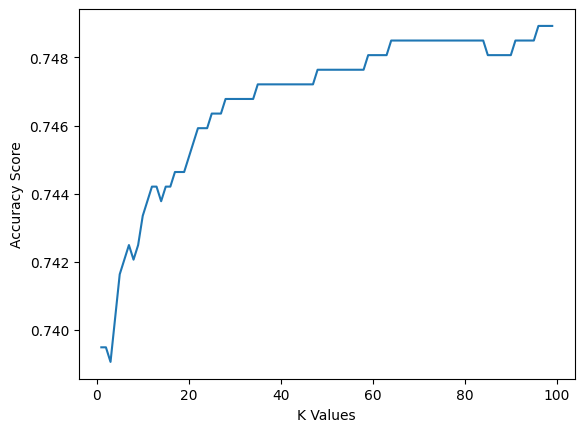

In [81]:
#plotting the k-values/accuracy score
sns.lineplot(data = crossval_df, x = 'c', y = 'validation')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score");

In [82]:
#finding the best k-value (in the c column)
crossval_df.iloc[crossval_df['validation'].idxmax()]

k                  NaN
train         0.749678
validation    0.748927
c                 96.0
Name: 95, dtype: object

In [83]:
#dropping the k column since our k-value is in the c column
crossval_df = crossval_df.drop(columns = 'k')

In [84]:
#scaling the data, fitting, and transforming the data. Then conducting a knn model using the best k-value recommended above 
fulltrain_scaler = MinMaxScaler()
X_train_sc = fulltrain_scaler.fit_transform(X_train)
X_test_sc = fulltrain_scaler.transform(X_test)

best_estimator = KNeighborsClassifier(n_neighbors=96)
best_estimator.fit(X_train_sc, y_train)

y_pred = best_estimator.predict(X_test_sc)

In [85]:
#printing out our results
y_hat_test = best_estimator.predict(X_test_sc)
y_hat_train = best_estimator.predict(X_train_sc)
print('Training Precision: ', precision_score(y_train, y_hat_train, average = 'micro'))
print('Testing Precision: ', precision_score(y_test, y_hat_test, average = 'micro'))
print('\n\n')
print('Training Recall: ', recall_score(y_train, y_hat_train, average = 'micro'))
print('Testing Recall: ', recall_score(y_test, y_hat_test, average = 'micro'))
print('\n\n')
print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')
print('Training F1-Score: ', f1_score(y_train, y_hat_train, average = 'micro'))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test, average = 'micro'))

Training Precision:  0.8107296137339056
Testing Precision:  0.797940797940798



Training Recall:  0.8107296137339056
Testing Recall:  0.797940797940798



Training Accuracy:  0.8107296137339056
Testing Accuracy:  0.797940797940798



Training F1-Score:  0.8107296137339056
Testing F1-Score:  0.797940797940798


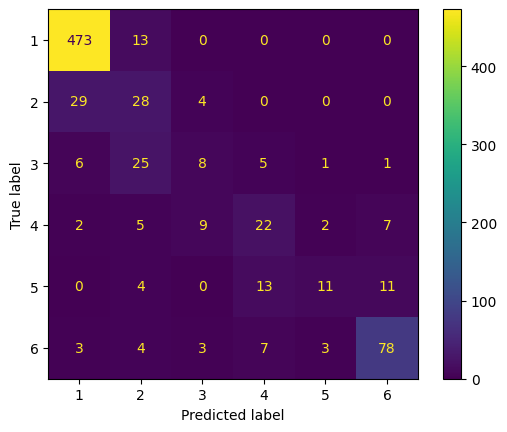

In [86]:
#confusion matrix for the knn model
ConfusionMatrixDisplay.from_estimator(best_estimator, X_test_sc, y_test);

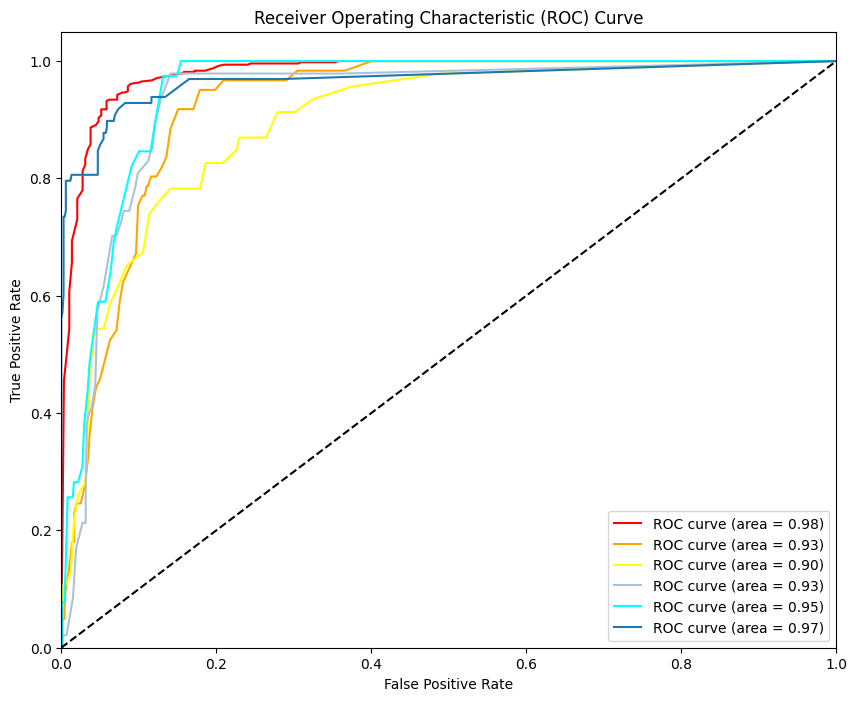

In [103]:
#creating a ROC graph for the KNN model

# Create an instance of the KNeighborsClassifier
best_estimator = KNeighborsClassifier(n_neighbors=96)

# Fit the classifier to the training data
best_estimator.fit(X_train_sc, y_train)

# Convert the multi-class labels into binary format
y_test_binary = label_binarize(y_test, classes=best_estimator.classes_)

# Get the predicted probabilities for each class
y_pred_prob = best_estimator.predict_proba(X_test_sc)

# Compute the false positive rate, true positive rate, and thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(best_estimator.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['red', 'orange', 'yellow', '#acc2d9', 'aqua', '#1f77b4']

for i in range(len(best_estimator.classes_)):
    plt.plot(fpr[i], tpr[i], color=colors[i], label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()